<a href="https://colab.research.google.com/github/devkyle4/Machine-Learning/blob/main/Diabetes_Xplainability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import shap
shap.initjs()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diabetes Model/data/Diabetes.csv')

In [ ]:
df.head()

,AGE,Gender,FPG,HbA1c,Nocturia,Polyuria,Weight_loss,Vomiting,Nausea,Polydipsia,Polyphagia,Headache,BMI,Outcome
0,52,F,7.0,6.7,True,True,True,False,False,False,False,False,31.0,positive
1,57,M,10.8,8.0,False,False,False,False,False,False,False,False,32.0,positive
2,56,F,3.6,5.0,False,False,False,False,False,False,False,False,23.0,negative
3,32,F,7.5,6.8,False,False,False,False,False,False,False,False,31.0,positive
4,51,M,5.7,6.2,False,False,False,False,False,False,False,False,20.0,negative


In [ ]:
positive, negative = df['Outcome'].value_counts()
neg = round((negative/len(df))*100, 2)
pos = 100 - neg

print(f'Positive: {pos}% \nNegative: {neg}%')

Positive: 65.56% 
Negative: 34.44%


In [ ]:
def plot_column_frequencies(df, column_name):
    value_counts = df[column_name].value_counts()
    value_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Frequency of Values in {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

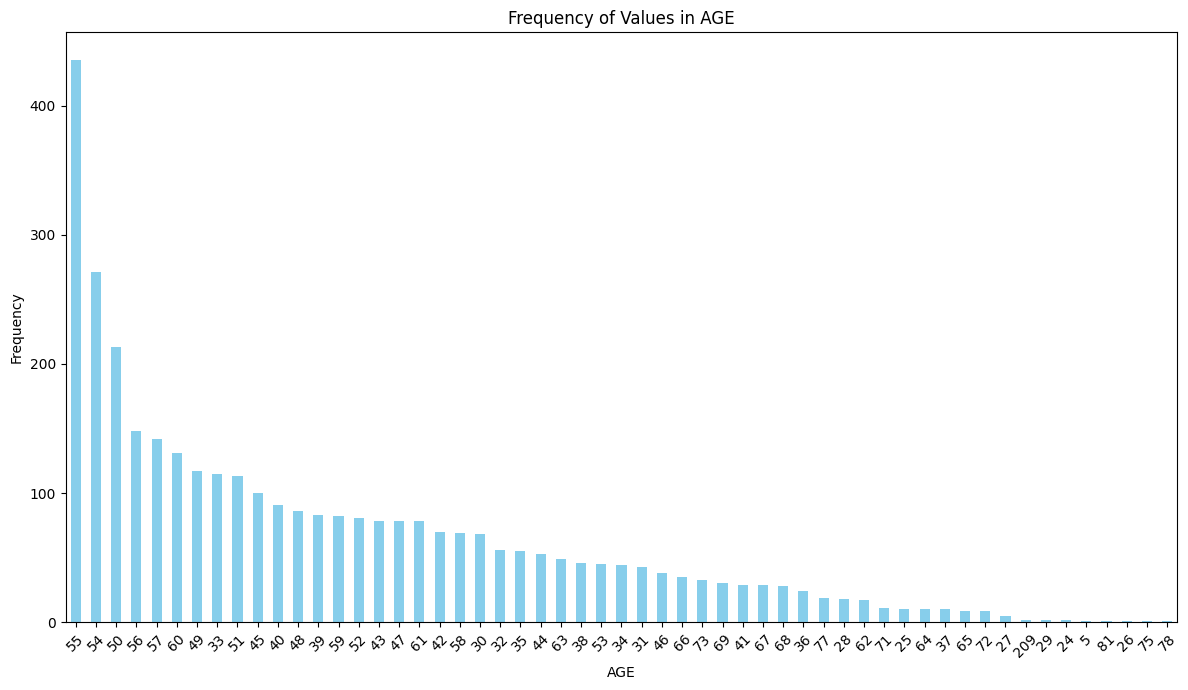

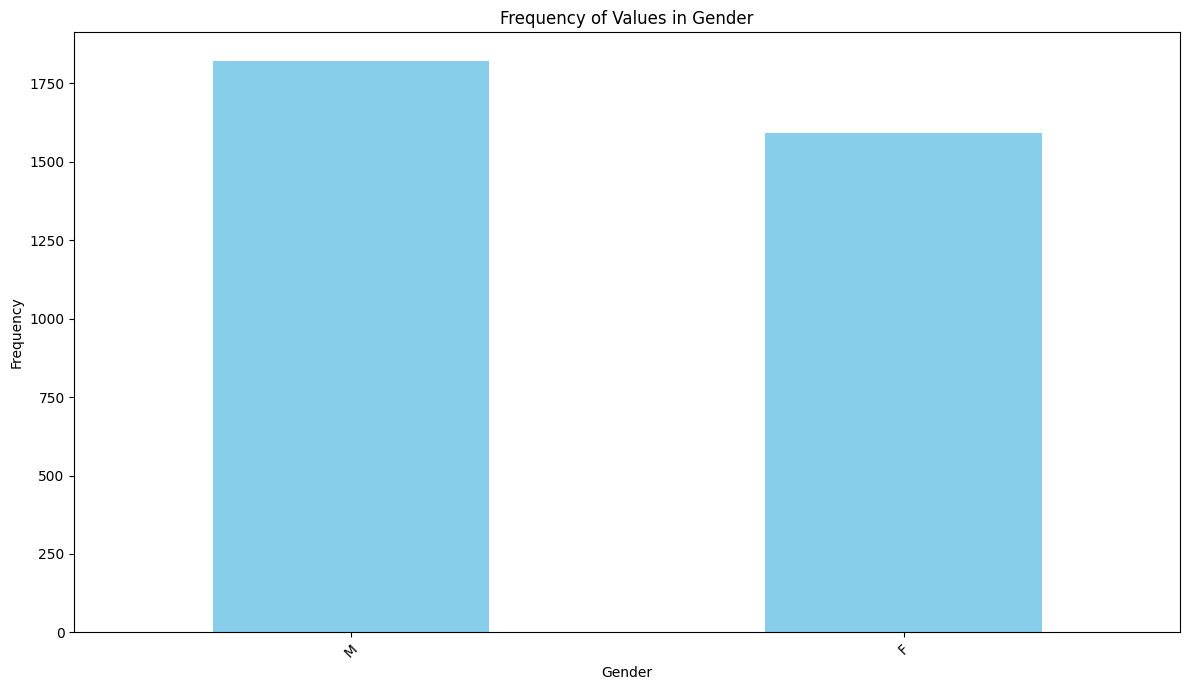

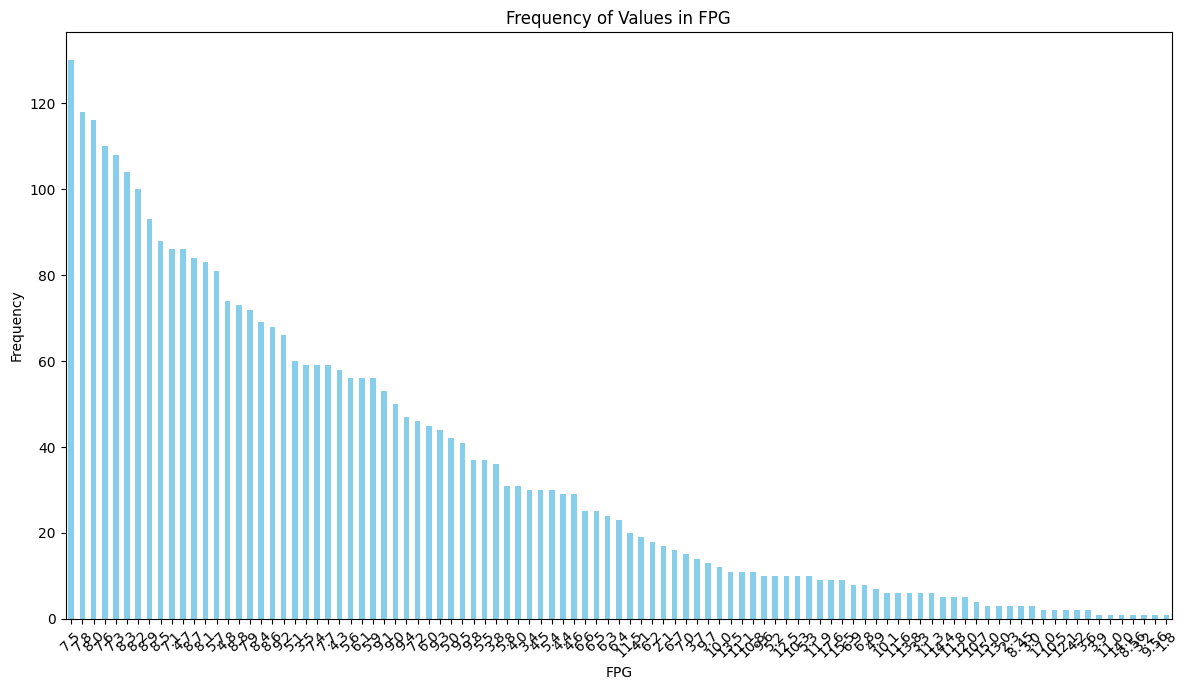

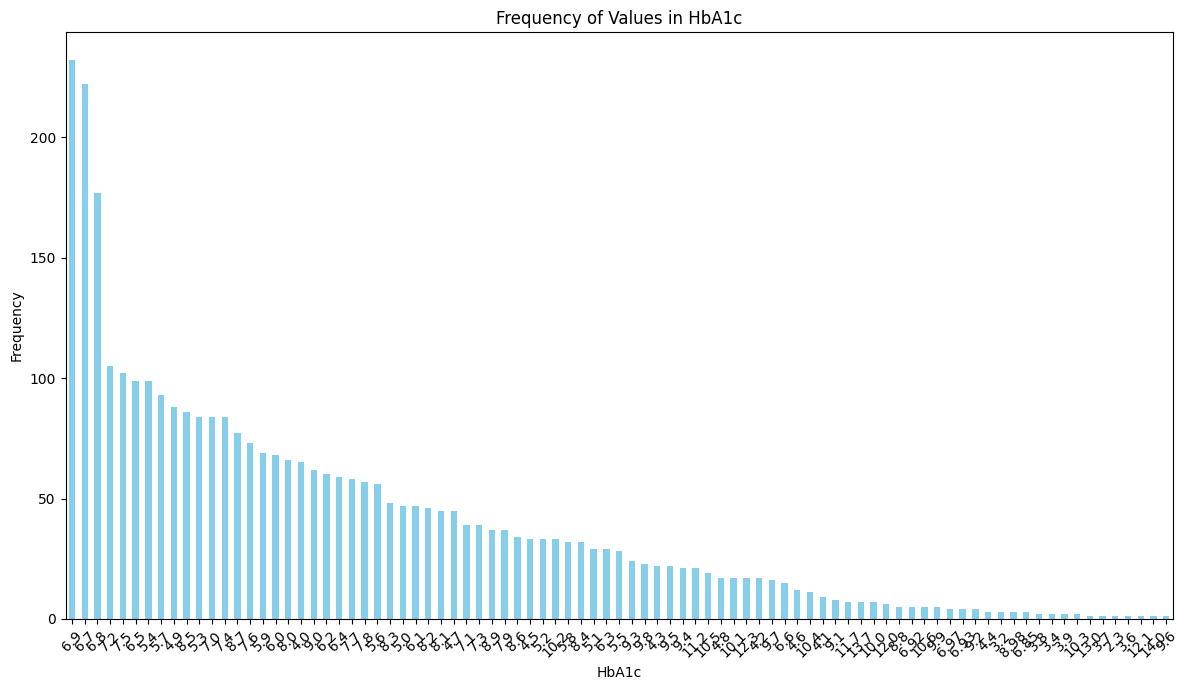

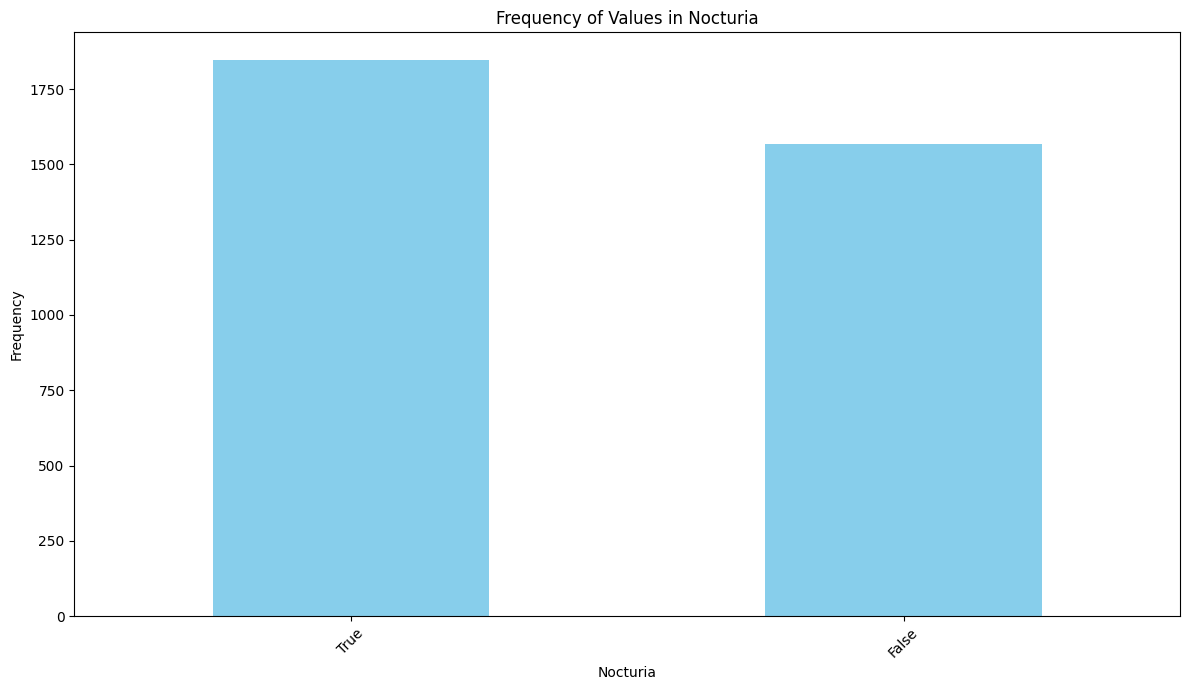

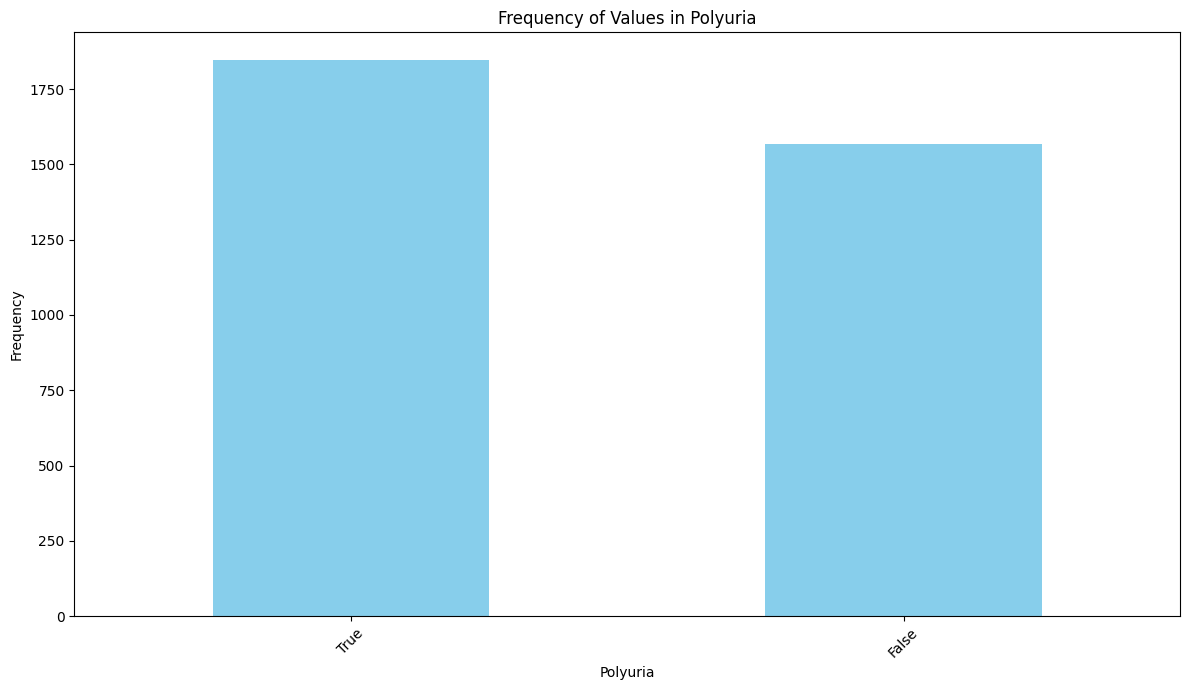

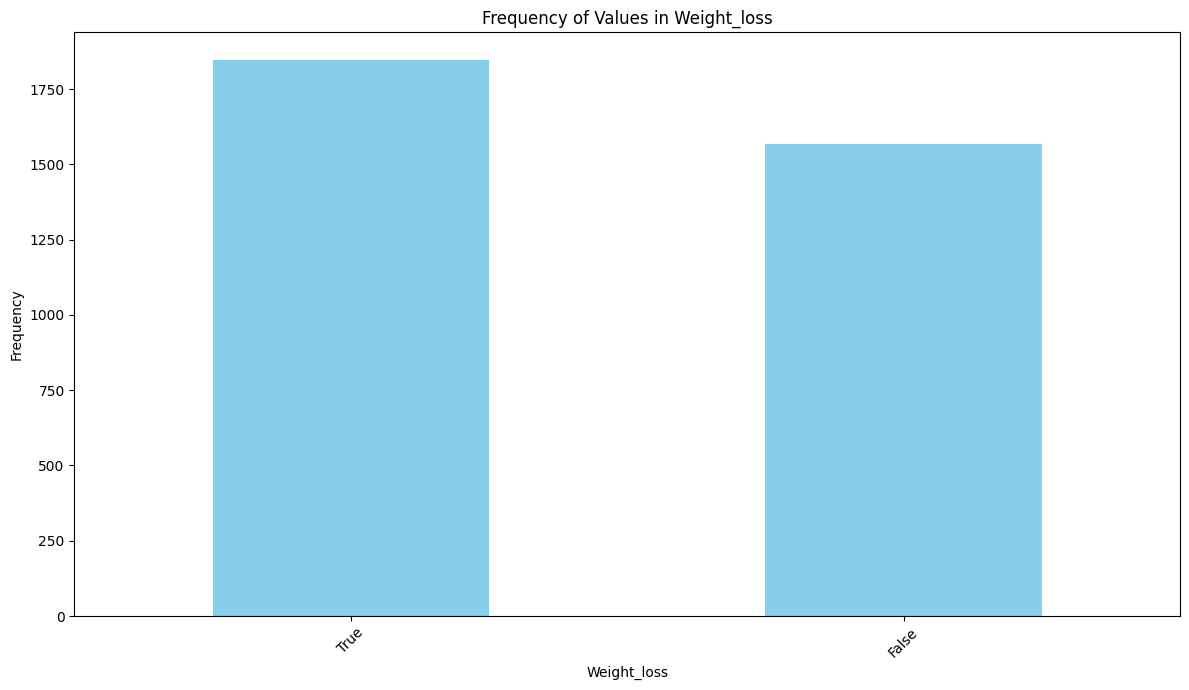

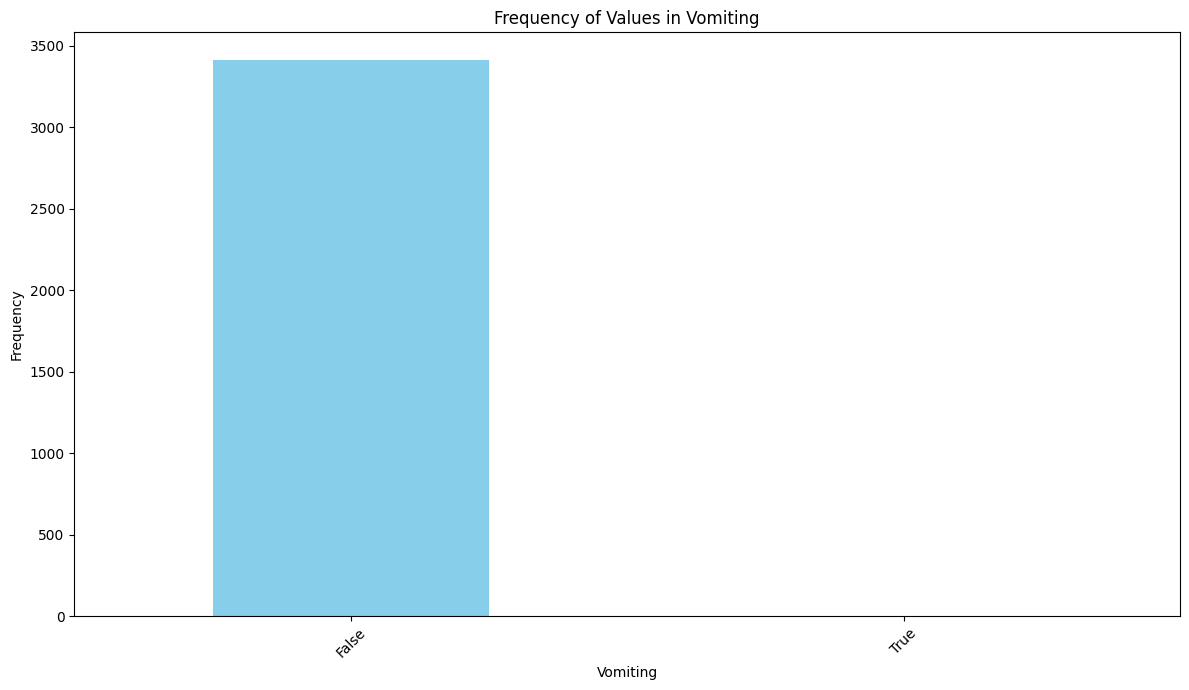

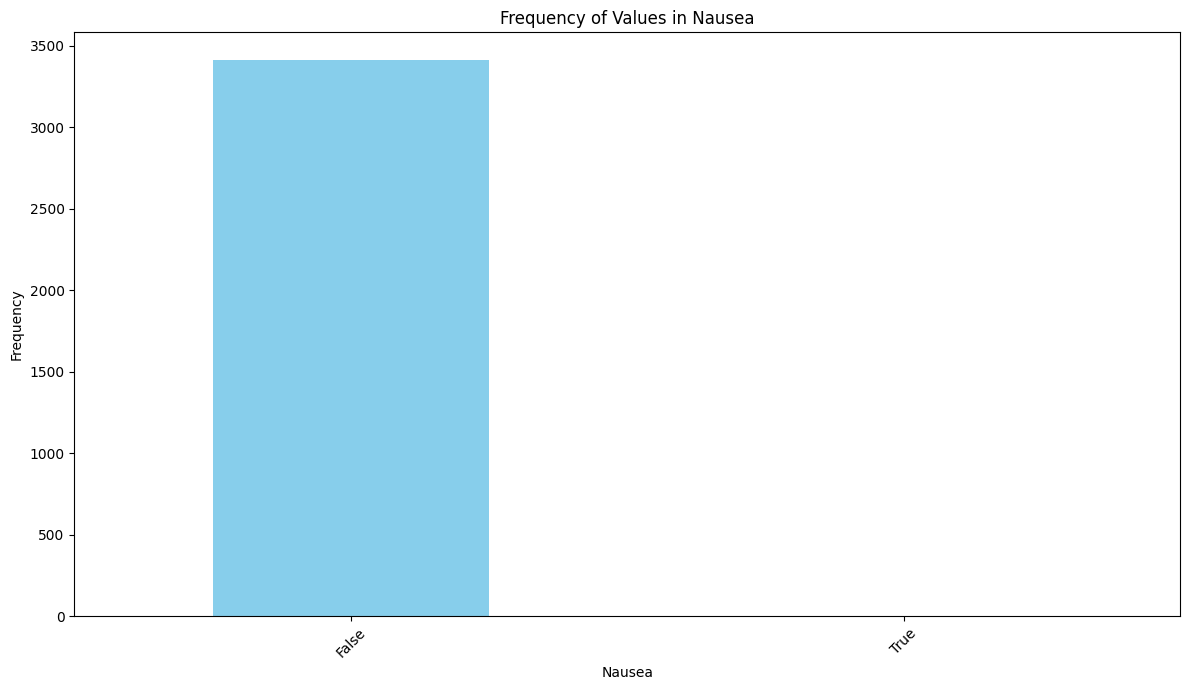

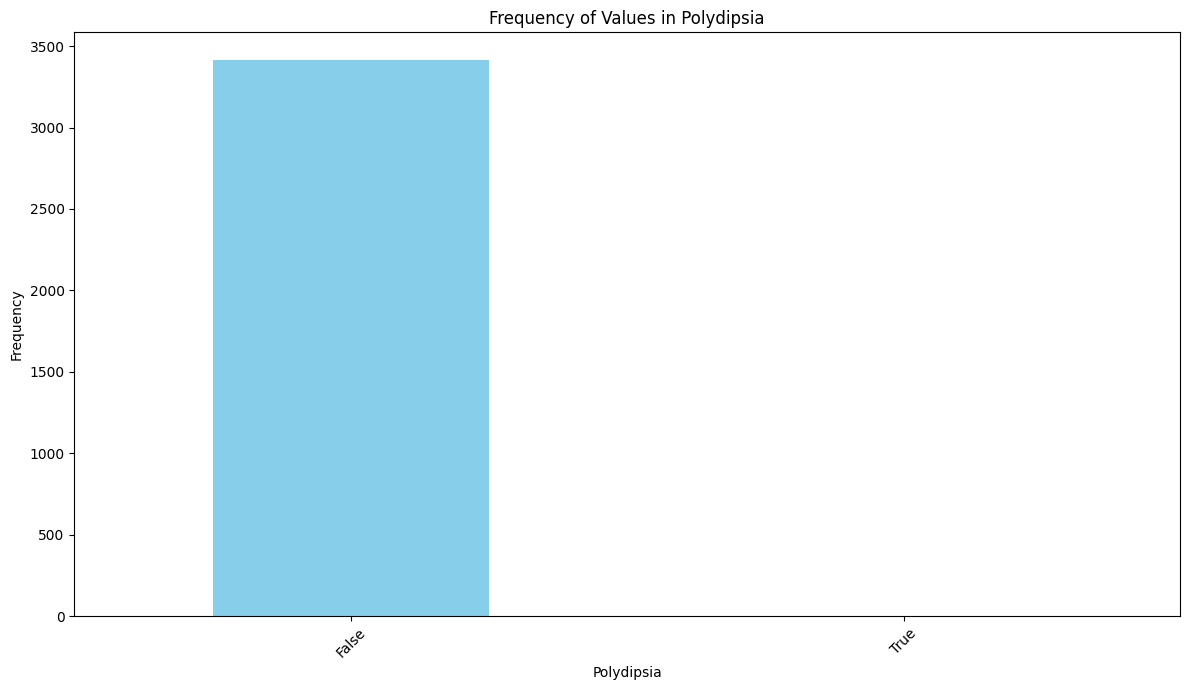

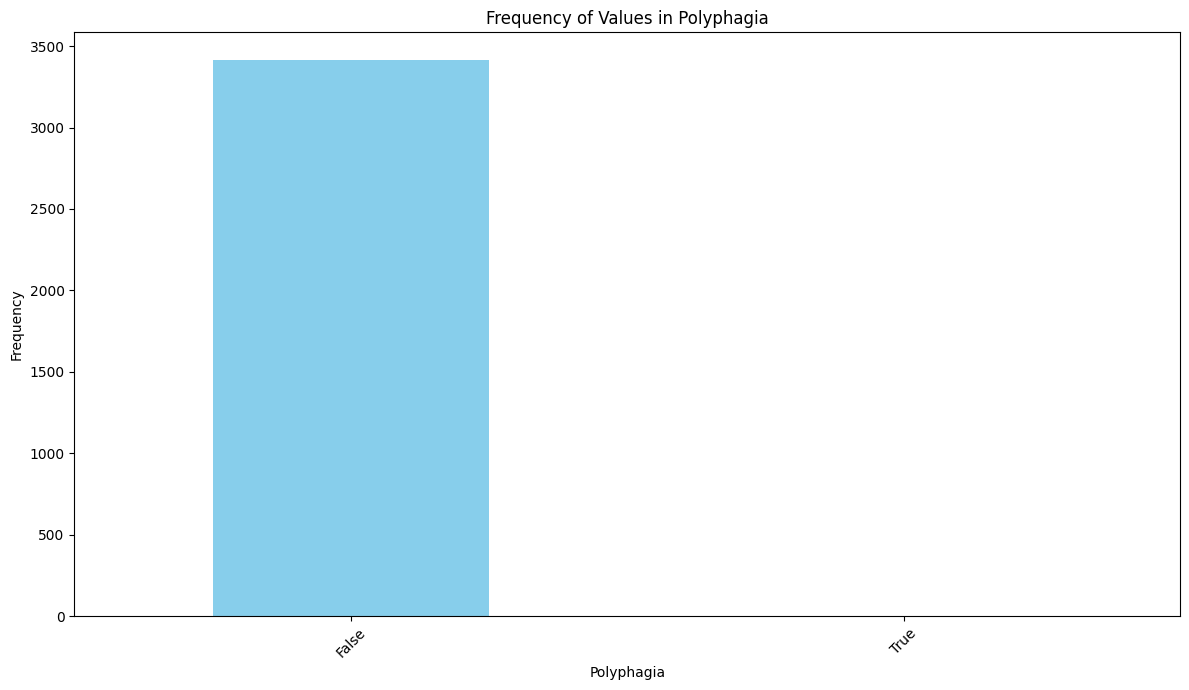

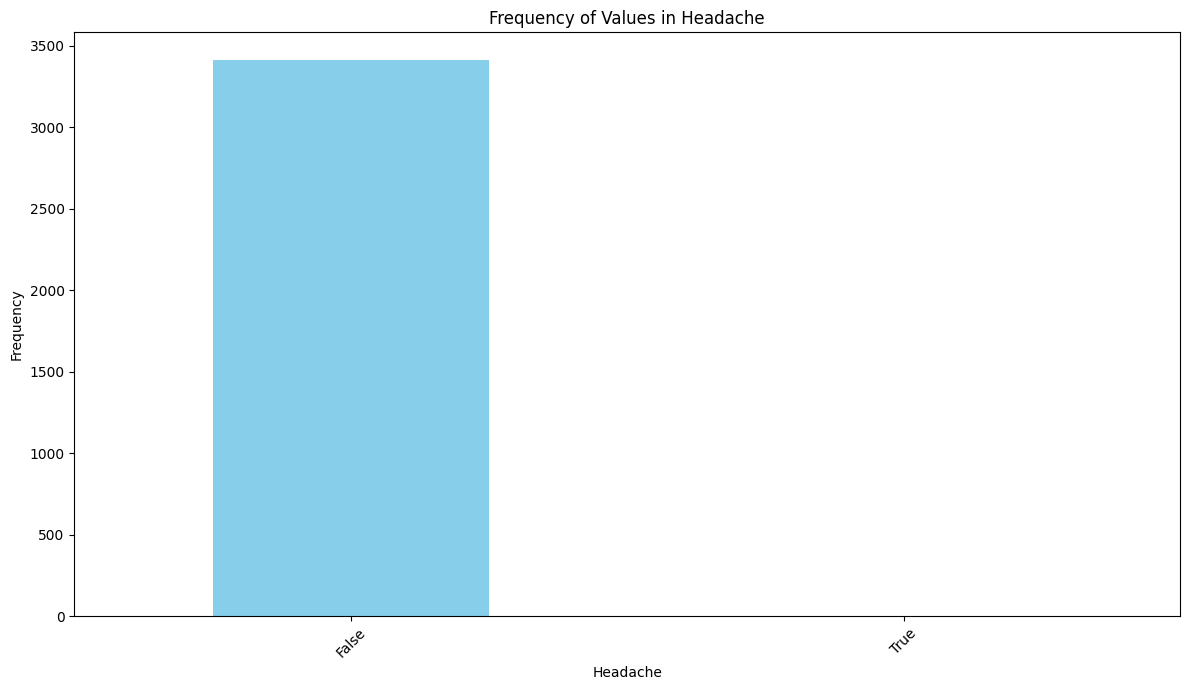

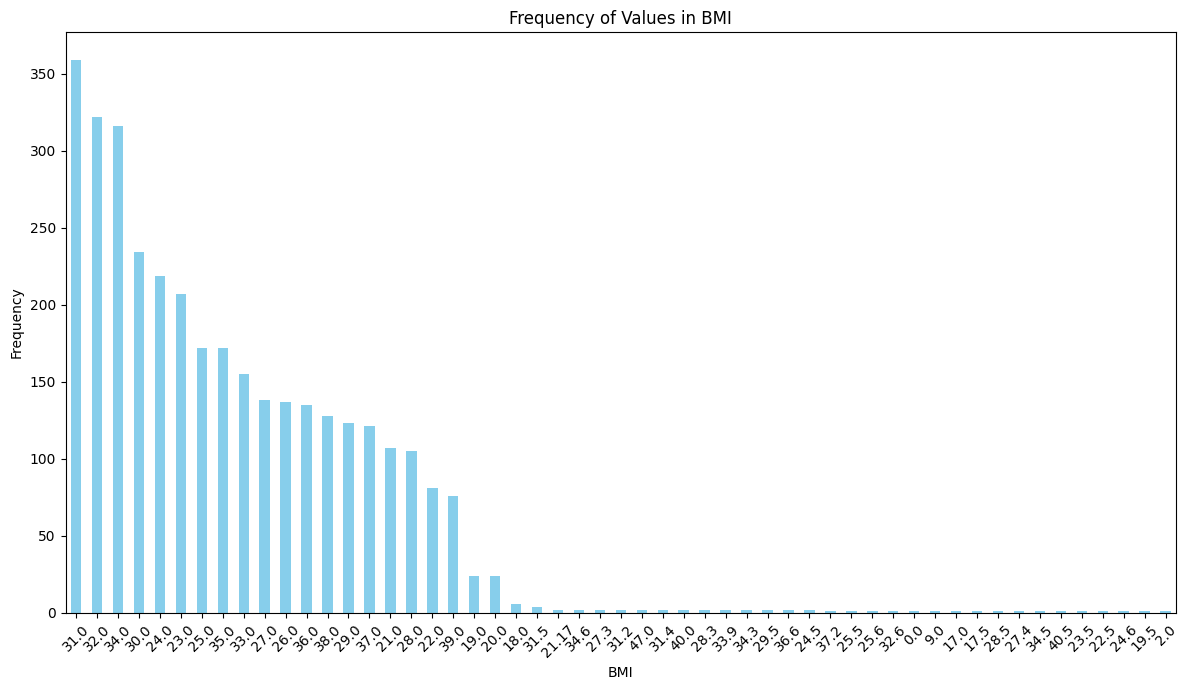

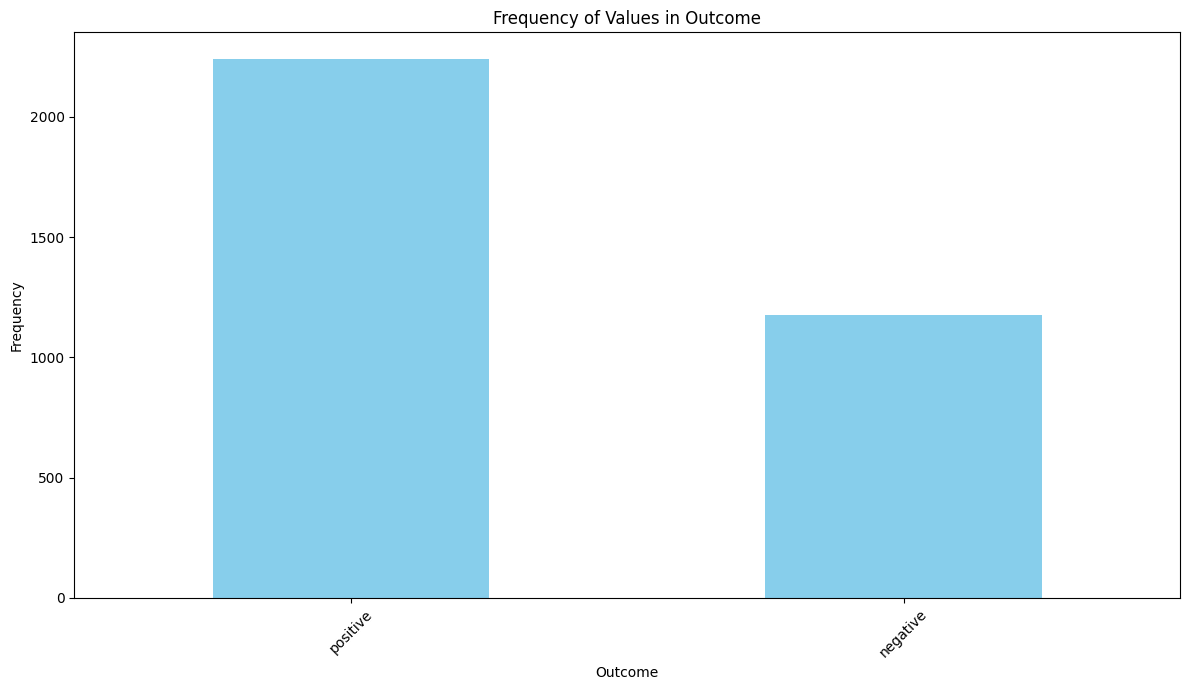

In [ ]:
for column in df.columns:
    plt.figure(figsize=(12, 7))
    plot_column_frequencies(df, column)

In [ ]:
df1 = df.drop(columns = ['Polydipsia', 'Polyphagia','Vomiting','Nausea','Headache'])

In [ ]:
null_values = df1.isnull().any()
print(null_values)

AGE            False
Gender          True
FPG            False
HbA1c          False
Nocturia       False
Polyuria       False
Weight_loss    False
BMI             True
Outcome        False
dtype: bool


In [ ]:
df1 = df1.dropna()
df1.isnull().any()

AGE            False
Gender         False
FPG            False
HbA1c          False
Nocturia       False
Polyuria       False
Weight_loss    False
BMI            False
Outcome        False
dtype: bool

In [ ]:
diab_distribution = df['Outcome'].value_counts()
diab_distribution

positive    2239
negative    1176
Name: Outcome, dtype: int64

In [ ]:
df1.head()

,AGE,Gender,FPG,HbA1c,Nocturia,Polyuria,Weight_loss,BMI,Outcome
0,52,F,7.0,6.7,True,True,True,31.0,positive
1,57,M,10.8,8.0,False,False,False,32.0,positive
2,56,F,3.6,5.0,False,False,False,23.0,negative
3,32,F,7.5,6.8,False,False,False,31.0,positive
4,51,M,5.7,6.2,False,False,False,20.0,negative


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

# Select the categorical columns to encode
categorical_columns = ['Gender', 'Nocturia','Polyuria','Weight_loss','Outcome']


# Encode the categorical columns
df1[categorical_columns] = df1[categorical_columns].apply(encoder.fit_transform)


In [ ]:
df1.head()

,AGE,Gender,FPG,HbA1c,Nocturia,Polyuria,Weight_loss,BMI,Outcome
0,52,0,7.0,6.7,1,1,1,31.0,1
1,57,1,10.8,8.0,0,0,0,32.0,1
2,56,0,3.6,5.0,0,0,0,23.0,0
3,32,0,7.5,6.8,0,0,0,31.0,1
4,51,1,5.7,6.2,0,0,0,20.0,0


#### Finding And Dropping Outliers

In [ ]:
# Q1 = df1.quantile(0.25)
# Q3 = df1.quantile(0.75)
# IQR = Q3 - Q1

# threshold = 1.5

# outlier_counts = {}
# columns = df1.columns
# for column in columns:
#     if column != 'Outcome':
#         # Identify potential outliers
#         lower_bound = Q1[column] - threshold * IQR[column]
#         upper_bound = Q3[column] + threshold * IQR[column]
#         outliers = df1[(df1[column] < lower_bound) | (df1[column] > upper_bound)]

#         df1 = df1[~df1.index.isin(outliers.index)]

#         num_outliers = len(outliers)

#         outlier_counts[column] = num_outliers

# for feature, count in outlier_counts.items():
#     print(f"{feature}, Outliers: {count}")

In [ ]:
diab_distribution1 = df1['Outcome'].value_counts()
diab_distribution1

1    2232
0    1175
Name: Outcome, dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3407 entries, 0 to 3414
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          3407 non-null   int64  
 1   Gender       3407 non-null   int64  
 2   FPG          3407 non-null   float64
 3   HbA1c        3407 non-null   float64
 4   Nocturia     3407 non-null   int64  
 5   Polyuria     3407 non-null   int64  
 6   Weight_loss  3407 non-null   int64  
 7   BMI          3407 non-null   float64
 8   Outcome      3407 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 266.2 KB


In [ ]:
diab_distribution = df1['Outcome'].value_counts()/len(df1)
diab_distribution

1    0.655122
0    0.344878
Name: Outcome, dtype: float64

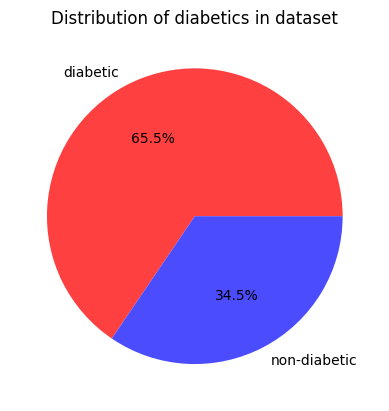

In [ ]:
#Checking Number of Diabetic and Non-Diabetic Patients
plt.pie(diab_distribution, labels = ['diabetic', 'non-diabetic'],
       autopct = '%1.1f%%', colors=['#ff4040','#4c4cff'])
plt.title("Distribution of diabetics in dataset")
plt.show()

In [ ]:
neg_diab = df1[df1['Outcome']==0]
pos_diab = df1[df1['Outcome']==1]

In [ ]:
df1.head()

,AGE,Gender,FPG,HbA1c,Nocturia,Polyuria,Weight_loss,BMI,Outcome
0,52,0,7.0,6.7,1,1,1,31.0,1
1,57,1,10.8,8.0,0,0,0,32.0,1
2,56,0,3.6,5.0,0,0,0,23.0,0
3,32,0,7.5,6.8,0,0,0,31.0,1
4,51,1,5.7,6.2,0,0,0,20.0,0


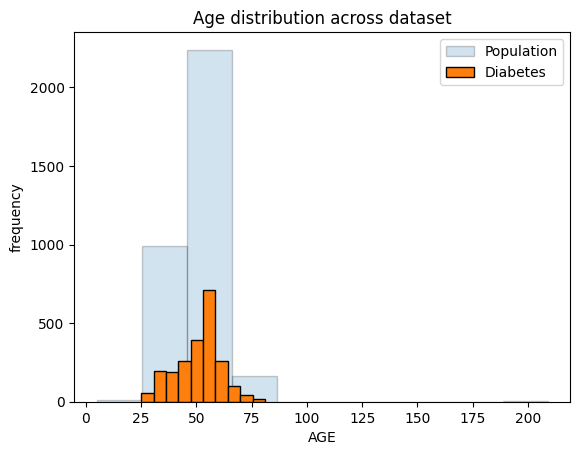

In [ ]:
plt.hist(df1['AGE'],histtype='bar',alpha=0.2, bins=10, ec = 'black',label="Population");
plt.hist(pos_diab['AGE'], histtype='bar', ec = 'black', bins=10,label="Diabetes")
plt.xlabel('AGE')
plt.ylabel('frequency')
plt.title('Age distribution across dataset')
plt.legend(loc='best')

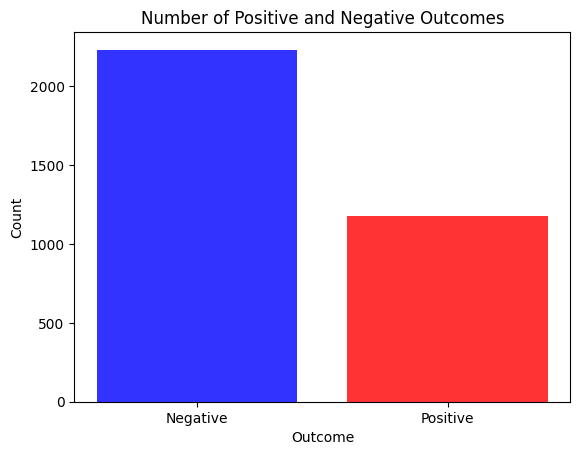

In [ ]:
outcome_counts = df1['Outcome'].value_counts()

labels = ['Negative', 'Positive']
colors = ['blue', 'red']


plt.bar(labels, outcome_counts, color=colors, alpha=0.8)

plt.title('Number of Positive and Negative Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')

# Show the plot
plt.show()


Splitting Data Into Train and Test Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df2 = df1.copy()

In [ ]:
columns_to_transform = ['AGE','FPG','HbA1c','BMI']
scaler = MinMaxScaler()

df2[columns_to_transform] = scaler.fit_transform(df2[columns_to_transform])

In [ ]:
X_scaled = df2.drop(['Outcome'], axis=1)
y_scaled = df2['Outcome']

In [ ]:
X = df1.drop(['Outcome'], axis=1)
y = df1['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

In [ ]:
columns = X_train.columns.tolist()

#***STATISTICAL TEST & ANALYSIS***

## **Feature Importance Analysis**


### Statistical Tests

In [ ]:
from scipy.stats import pearsonr, spearmanr, kendalltau
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway  # For ANOVA


CATEGORICAL_PREDICTORS = ['Polyuria', 'Gender', 'Nocturia']
CONTINUOUS_PREDICTORS =  ['AGE', 'FPG', 'HbA1c', 'Weight_loss', 'BMI']

# Perform chi-squared tests for each categorical predictor
def chi_squared(categorical_predictors):
  for predictor in categorical_predictors:
      contingency_table = pd.crosstab(df1[predictor], df1['Outcome'])
      chi2, p, _, _ = chi2_contingency(contingency_table)
      print(f"{predictor} - Chi-squared test statistic: {chi2}, p-value: {p}")

# Categorical vs. Continuous (ANOVA)
def anova(categorical_predictors, continuous_predictors):
  for predictor in categorical_predictors:
      for feature in continuous_predictors:
          group_values = [df1[feature][df1[predictor] == category] for category in df1[predictor].unique()]
          f_statistic, p = f_oneway(*group_values)
          print(f"{predictor} vs. {feature} - F-statistic: {f_statistic}, p-value: {p}")

# Continuous vs. Continuous (Correlation)
def stat_correlation(continuous_features):
  for feature1 in continuous_features:
      for feature2 in continuous_features:
          if feature1 != feature2:
              correlation, p = pearsonr(df1[feature1], df1[feature2])
              print(f"{feature1} vs. {feature2} - Pearson Correlation: {correlation}, p-value: {p}")

# Pearson correlation between Independent and Dependent Variables
def pearsons_correlation(continuous_features, categorical_predictors):
  features = continuous_features + categorical_predictors
  for feature1 in features:
              correlation, p = pearsonr(df1[feature1], df1['Outcome'])
              print(f"{feature1} vs. {'Outcome'} - Pearson Correlation: {correlation}, p-value: {p}")


In [ ]:
pearsons_correlation(CONTINUOUS_PREDICTORS, CATEGORICAL_PREDICTORS)

AGE vs. Outcome - Pearson Correlation: 0.07019944088347647, p-value: 4.1125580246511324e-05
FPG vs. Outcome - Pearson Correlation: 0.7734213800801765, p-value: 0.0
HbA1c vs. Outcome - Pearson Correlation: 0.7246246987505511, p-value: 0.0
Weight_loss vs. Outcome - Pearson Correlation: 0.7270500089982848, p-value: 0.0
BMI vs. Outcome - Pearson Correlation: 0.6903192869673301, p-value: 0.0
Polyuria vs. Outcome - Pearson Correlation: 0.7270500089982848, p-value: 0.0
Gender vs. Outcome - Pearson Correlation: -0.013203505377482461, p-value: 0.44104311459918794
Nocturia vs. Outcome - Pearson Correlation: 0.7270500089982848, p-value: 0.0


#***MACHINE LEARNING***

In [ ]:
def feature_importance_graph(feature_names, model):
    if isinstance(model,SVC):
      feature_importance = model.coef_[0]
    else:
      feature_importance = model.feature_importances_
    print("Feature Importances:")
    for feature, importance in zip(X_train.columns, feature_importance):
      print(f"{feature}: {importance}")

    feature_importance_pairs = list(zip(feature_names, feature_importance))
    # Sorting by the second element[index 1] in the tuple
    feature_importance_pairs.sort(key=lambda x: x[1])

    # Separate the feature names and importances after sorting
    feature_names, sorted_importances = zip(*feature_importance_pairs)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, sorted_importances, color='skyblue')
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance for Model (Sorted)')
    plt.gca().invert_yaxis()
    plt.show()


In [ ]:
def matthew_corr_coeff(CONFUSION_MATRIX):
  tn, fp, fn, tp = CONFUSION_MATRIX.ravel()
  mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
  # handling division by 0 error
  if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) == 0:
      mcc = 0
  print("Matthews Correlation Coefficient (MCC):", mcc)

In [ ]:
def ROC_CURVE(Y_TEST, model):
  Y_PRED_PROB = model.predict_proba(X_test)[:, 1]

  fpr, tpr, thresholds = roc_curve(Y_TEST, Y_PRED_PROB)
  roc_auc = roc_auc_score(Y_TEST, Y_PRED_PROB)
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')
  plt.show()

In [ ]:
def plot_shap(shap_0, shap_1, model):
  columns = X_train.columns
  MODELS = ['XGBOOST', 'RANDOM FOREST', 'SIMPLE NEURAL NETWORK', 'SVM']

  if isinstance(model, RandomForestClassifier):
    MODEL = MODELS[1]
  elif isinstance(model, XGBClassifier):
    MODEL = MODELS[0]
  elif isinstance(model, SVC):
    MODEL = MODELS[3]
  else:
    MODEL = MODELS[2]

  plt.figure(figsize=(10, 6))
  plt.bar(columns, shap_0, label='Non-Diabetic', color='red', alpha=0.75)
  plt.bar(columns,shap_1, label='Diabetic', color='blue', alpha=0.7)
  plt.xlabel('Features')
  plt.ylabel('Mean SHAP Values')
  plt.legend()
  plt.title(f"Mean SHAP Values by Class With a {MODEL}")
  plt.show()

In [ ]:
def Classification_Report(Y_TEST, Y_PRED):
  accuracy = accuracy_score(Y_TEST, Y_PRED)
  print("Accuracy:", accuracy)
  print("Classification Report:\n", classification_report(Y_TEST, Y_PRED))
  cm = confusion_matrix(Y_TEST, Y_PRED)
  sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
  plt.xlabel('Predicted')
  plt.ylabel('Truth');
  matthew_corr_coeff(cm)

In [ ]:
colors = ['red','blue','green']

def roc_for_all_models(y_test, model_names, model_predictions):

    plt.figure(figsize=(10, 8))

    # Plot the diagonal line (represents random guessing)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    for y_score, name, color in zip(model_predictions, model_names, colors):
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, color=color, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc="lower right")
    plt.show()

## Random Forest

### Calculating Feature Importance Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Accuracy and Evaluation Metric of RF Algorithm

In [ ]:
ypred_rf = rf_model.predict(X_test)
ypreds_prob_rf = rf_model.predict_proba(X_test)[:, 1]

Accuracy: 0.9931573802541545
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       325
           1       1.00      0.99      0.99       698

    accuracy                           0.99      1023
   macro avg       0.99      0.99      0.99      1023
weighted avg       0.99      0.99      0.99      1023

Matthews Correlation Coefficient (MCC): 0.9842776834885674


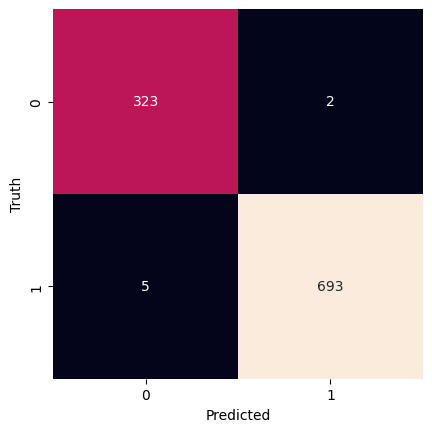

In [ ]:
Classification_Report(y_test, ypred_rf)

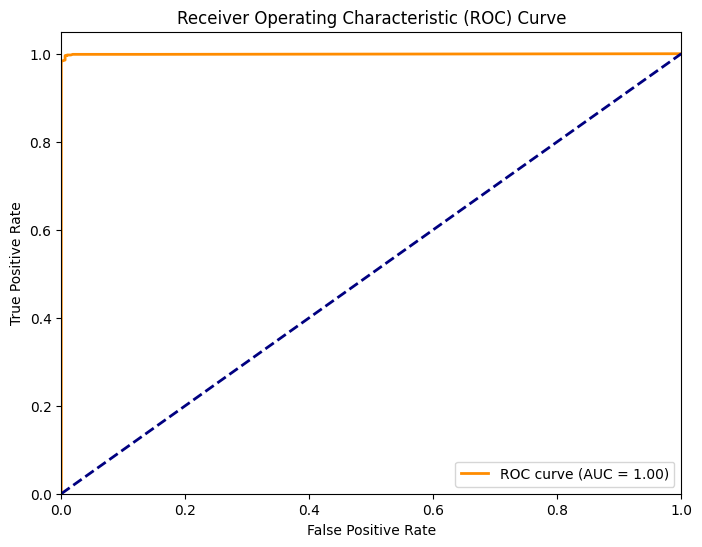

In [ ]:
ROC_CURVE(y_test, rf_model)

### **SHAP ANALYSIS FOR RANDOM FOREST**

In [ ]:
rf_explainer = shap.TreeExplainer(rf_model)
rf_shap_values = rf_explainer(X_test).values

In [ ]:
mean_shap_rf_0 = np.mean(rf_shap_values[:, :, 0], axis=0)
mean_shap_rf_1 = np.mean(rf_shap_values[:, :, 1], axis=0)

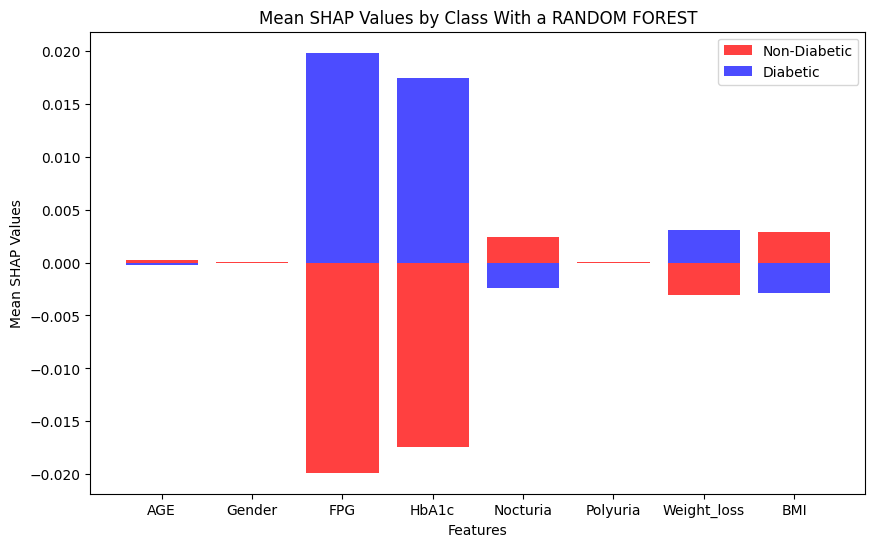

In [ ]:
plot_shap(mean_shap_rf_0, mean_shap_rf_1, rf_model)

## XGBOOST

### Calculating Feature Importance Using XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(n_estimators=1000,
                          learning_rate=0.07,
                          random_state=42)

xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)],verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.07, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
xgb_ypreds = xgb_model.predict(X_test)
ypreds_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

#### Accuracy and Evaluation Metric of XGBoost Algorithm

Accuracy: 0.9931573802541545
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       325
           1       1.00      0.99      0.99       698

    accuracy                           0.99      1023
   macro avg       0.99      0.99      0.99      1023
weighted avg       0.99      0.99      0.99      1023

Matthews Correlation Coefficient (MCC): 0.9842319059056394
CPU times: user 83.6 ms, sys: 23 ms, total: 107 ms
Wall time: 128 ms


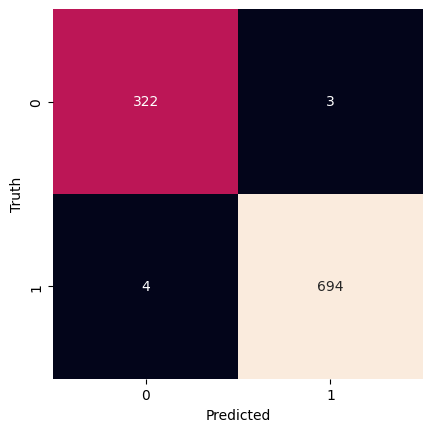

In [ ]:
%%time
Classification_Report(y_test, xgb_ypreds)

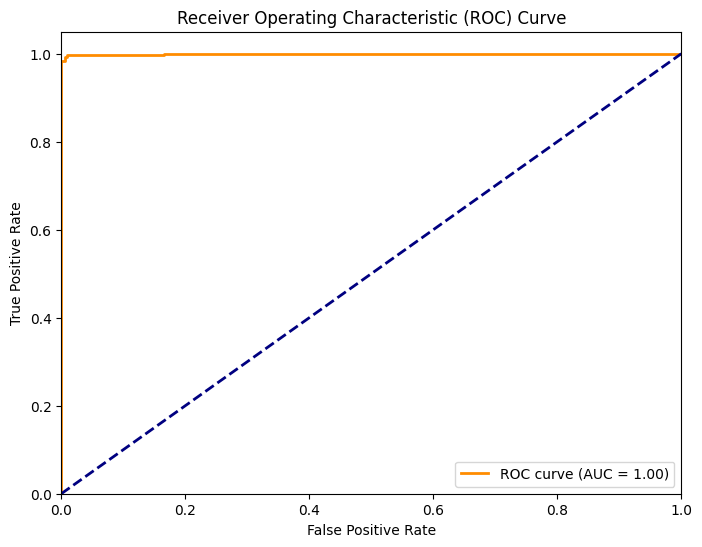

In [ ]:
ROC_CURVE(y_test, xgb_model)

### **SHAP ANALYSIS FOR XGBOOST**

In [ ]:
xgb_explainer = shap.TreeExplainer(xgb_model)
xgb_shap_values = xgb_explainer(X_test).values

[07:56:01] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [ ]:
xgb_shap_0 = xgb_shap_values[y_test == 0]
xgb_shap_1 = xgb_shap_values[y_test == 1]

In [ ]:
xgb_mean_shap_0 = xgb_shap_0.mean(0)
xgb_mean_shap_1 = xgb_shap_1.mean(0)

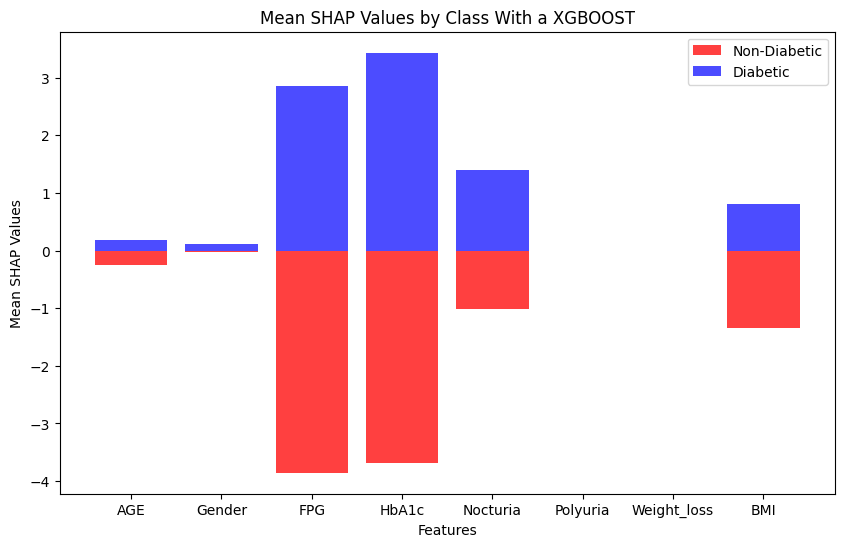

In [ ]:
plot_shap(xgb_mean_shap_0, xgb_mean_shap_1, xgb_model)

In [ ]:
xgb_explainer = shap.TreeExplainer(xgb_model)
xgb_shap_instance = xgb_explainer.shap_values(X_test.iloc[[10]])

[07:56:05] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


### **LOCAL EXPLAINER**

In [ ]:
def waterfall_plot(instance, model):

  if isinstance(model, (RandomForestClassifier, XGBClassifier)):
    explainer = shap.TreeExplainer(model)

    if isinstance(model, RandomForestClassifier):
      shap_values_ins = explainer(instance)

      values=shap_values_ins[:,1].values,
      base_values=shap_values_ins[:,1].base_values[0],
      data=shap_values_ins.data,
      feature_names=shap_values_ins.data.index.tolist()



    else:
      shap_values_ins = explainer.shap_values(instance).flatten()
      values=shap_values_ins,
      base_values=explainer.expected_value,
      data=instance.values.flatten(),
      feature_names=X_test.columns.tolist(),


  elif isinstance(model, SVC):
    explainer = shap.KernelExplainer(svm_model.predict_proba, shap.sample(X_train, 100))
    shap_values = explainer.shap_values(instance)

    values=shap_values[1],
    base_values=explainer.expected_value[1],
    data=instance,
    feature_names=X_test.columns.tolist()


  else:
    explainer = shap.Explainer(model, X_train_scaled)
    shap_values = explainer(instance)

    values=shap_values.values.flatten(),
    base_values=shap_values.base_values[0][0],
    data=shap_values.data[0],
    feature_names=X_test.columns.tolist()


  shap.plots.waterfall(shap.Explanation(
                                      values=values,
                                      base_values=base_values,
                                      data=data,
                                      feature_names=feature_names)[0])





  plt.show()

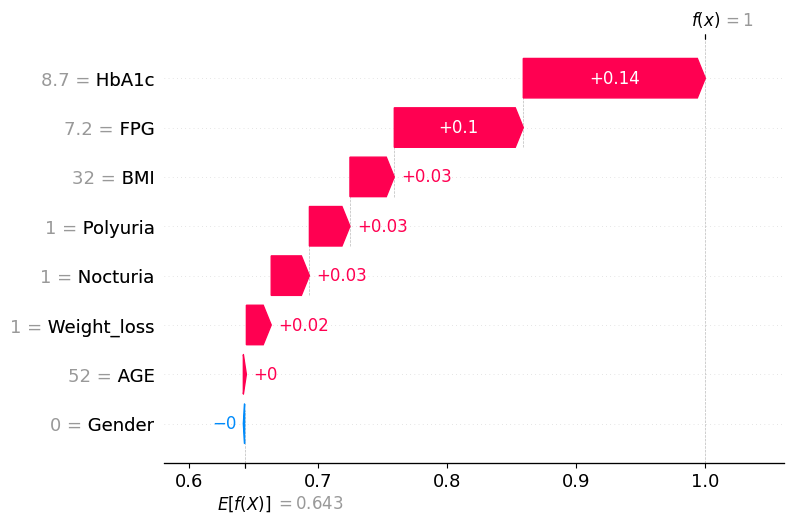

In [ ]:
waterfall_plot(X_test.iloc[99], rf_model)

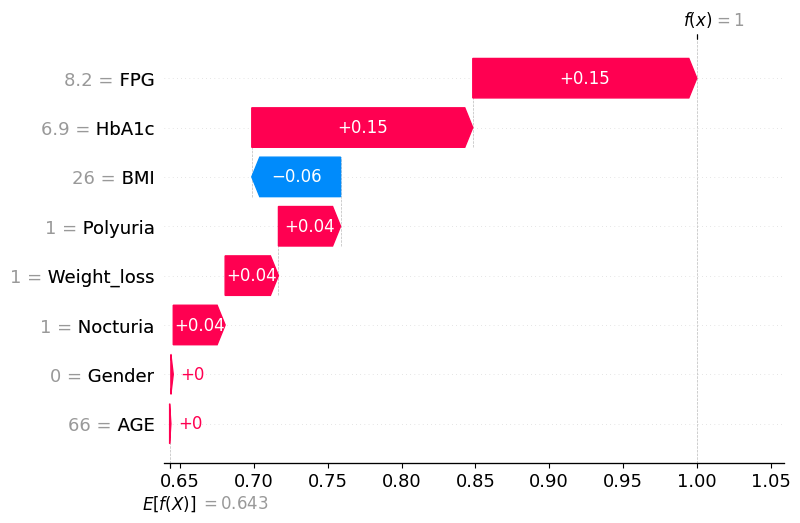

In [ ]:
instance_to_explain = X_test.iloc[10]
waterfall_plot(instance_to_explain, rf_model)

In [ ]:
shap.initjs()
shap.force_plot(
    xgb_explainer.expected_value,
    xgb_shap_instance,
    X_test.iloc[[99]],
)

[07:56:11] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


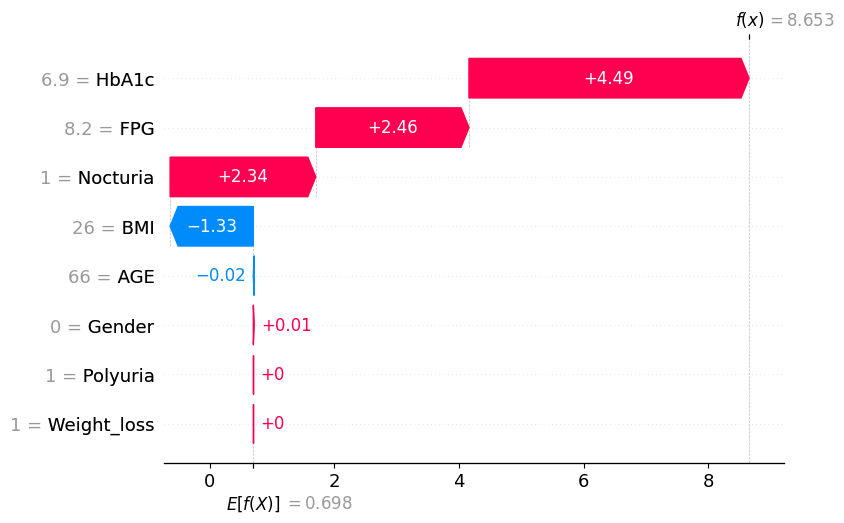

In [ ]:
instance_to_explain = X_test.iloc[[10]]
waterfall_plot(X_test.iloc[[10]], xgb_model)

[07:56:12] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


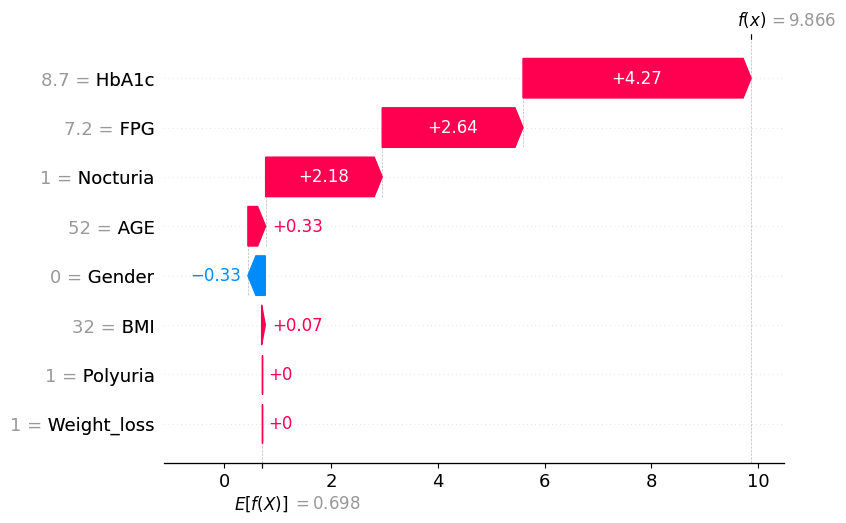

In [ ]:
instance_to_explain = X_test.iloc[[99]]
waterfall_plot(instance_to_explain, xgb_model)

### **SUPPORT VECTOR MACHINE**

In [ ]:
svm_model = SVC(kernel='linear', C=1,probability=True)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
ypreds_prob_svm = xgb_model.predict_proba(X_test)[:,1]

Accuracy: 0.9931573802541545
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       325
           1       1.00      0.99      0.99       698

    accuracy                           0.99      1023
   macro avg       0.99      0.99      0.99      1023
weighted avg       0.99      0.99      0.99      1023

Matthews Correlation Coefficient (MCC): 0.9842776834885674


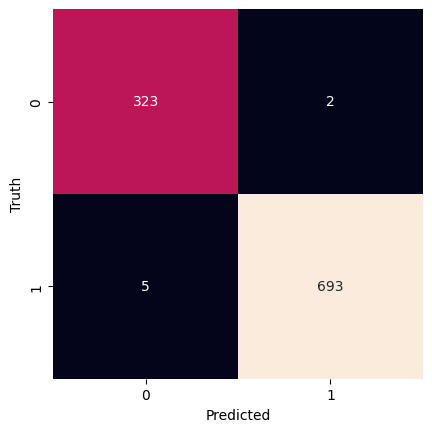

In [ ]:
Classification_Report(y_test, y_pred_svm)

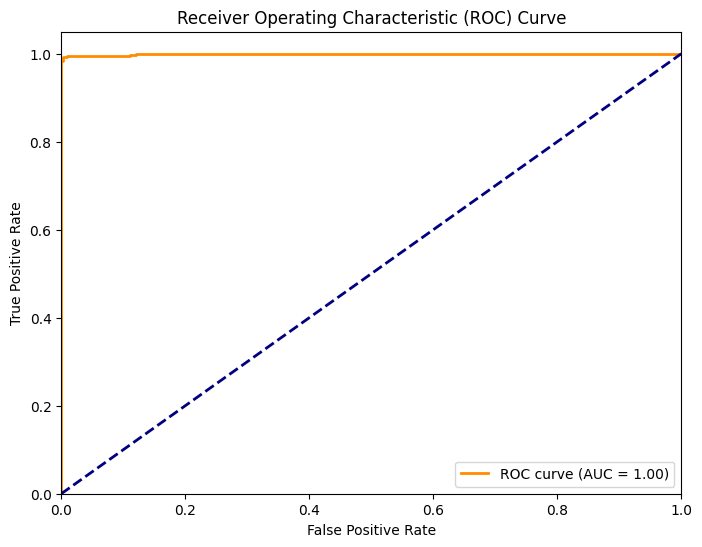

In [ ]:
ROC_CURVE(y_test, svm_model)

### **SHAP FOR SVM**

In [ ]:
background_summary = shap.sample(X_train, 100)

In [ ]:
svm_explainer = shap.KernelExplainer(svm_model.predict_proba, background_summary)

In [ ]:
svm_shap_values = svm_explainer.shap_values(X_test)

  0%|          | 0/1023 [00:00<?, ?it/s]

In [ ]:
svm_shap_values

[array([[-0.00729655, -0.00357461, -0.11488443, ..., -0.01555266,
         -0.01555266, -0.02342778],
        [ 0.00350432, -0.0039531 , -0.17210685, ..., -0.01730579,
         -0.01730579, -0.03054759],
        [ 0.00094371, -0.00720799, -0.17855013, ..., -0.02828899,
         -0.02828899, -0.04101326],
        ...,
        [-0.01695926,  0.00497978, -0.14767473, ..., -0.02583993,
         -0.02583993, -0.06958262],
        [ 0.00517012,  0.00482427,  0.26502073, ...,  0.01945911,
          0.01945911,  0.03562489],
        [ 0.00043559, -0.0040635 , -0.20448213, ..., -0.01735237,
         -0.01735237, -0.03589755]]),
 array([[ 0.00729655,  0.00357461,  0.11488443, ...,  0.01555266,
          0.01555266,  0.02342778],
        [-0.00350432,  0.0039531 ,  0.17210685, ...,  0.01730579,
          0.01730579,  0.03054759],
        [-0.00094371,  0.00720799,  0.17855013, ...,  0.02828899,
          0.02828899,  0.04101326],
        ...,
        [ 0.01695926, -0.00497978,  0.14767473, ...,  

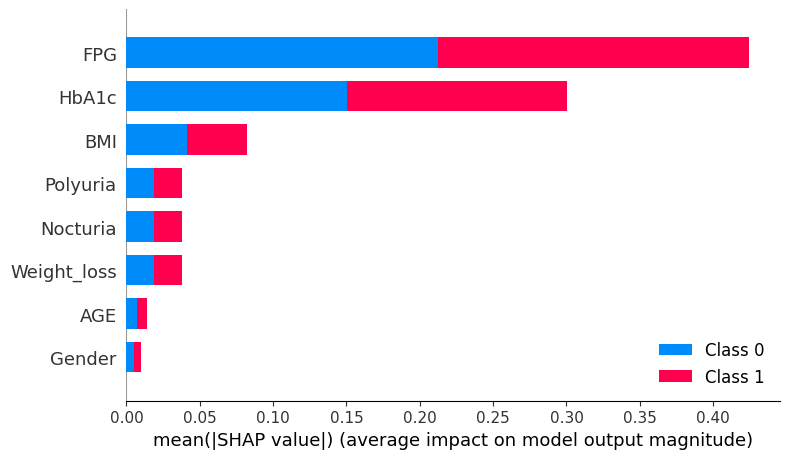

In [ ]:
shap.summary_plot(svm_shap_values, X_test, feature_names=X_test.columns.tolist(), show=True)

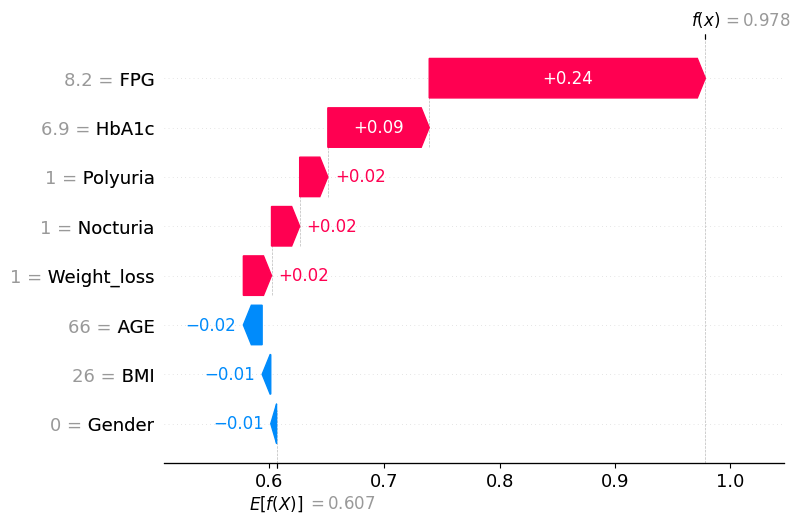

In [ ]:
instance_to_explain = X_test.iloc[10]
waterfall_plot(instance_to_explain, svm_model)

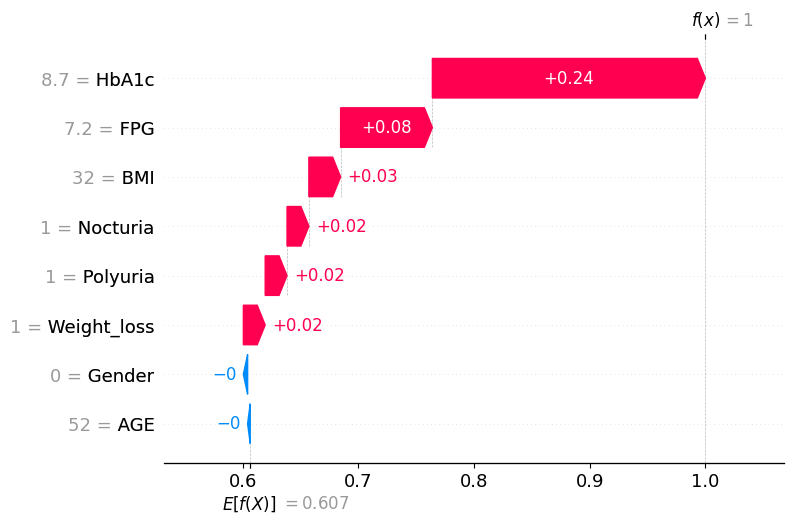

In [ ]:
instance_to_explain = X_test.iloc[99]
waterfall_plot(instance_to_explain, svm_model)

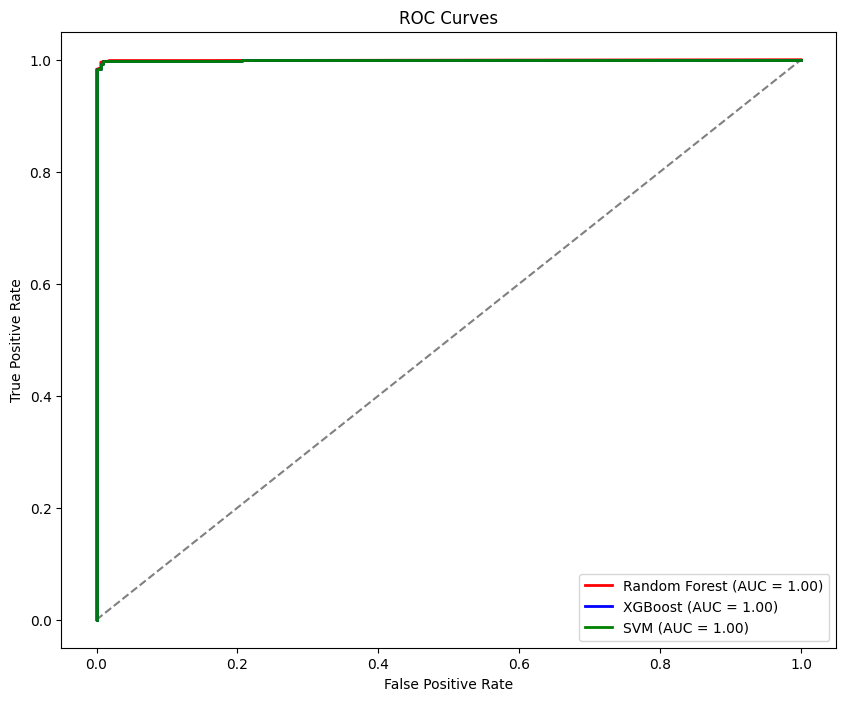

In [ ]:
model_names = ['Random Forest', 'XGBoost', 'SVM']
model_preds = [ypreds_prob_rf, ypreds_prob_xgb, ypreds_prob_svm]

roc_for_all_models(y_test, model_names, model_preds)

In [ ]:
X_train_scaled = X_train_scaled.values
X_test_scaled = X_test_scaled.values
y_train_scaled = y_train_scaled.values
y_test_scaled = y_test_scaled.values

## ARTIFICIAL NEURAL NETWORK

In [ ]:
import tensorflow as tf
from keras.losses import BinaryCrossentropy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
# X_val, X_test_nn, y_val, y_test_nn = train_test_split(X_test_scaled, y_test_scaled, test_size=0.5, random_state=42)

In [ ]:
def build_ann(input_shape):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

def train_model(model, X_train, y_train, learning_rate, epochs, batch_size, X_val, y_val):
    optimizer = Adam(learning_rate=learning_rate)
    loss_fn = BinaryCrossentropy()

    for epoch in range(epochs):
        loss_values = []
        correct = 0

        for step in range(0, len(X_train), batch_size):
            X_batch = X_train[step:step + batch_size]
            y_batch = y_train[step:step + batch_size]
            y_batch = y_batch.reshape(-1,1)

            with tf.GradientTape() as tape:
                y_pred = model(X_batch, training=True)
                loss = loss_fn(y_batch, y_pred)
                loss_values.append(loss.numpy())

                y_pred_binary = (y_pred > 0.5)
                correct += np.sum(y_pred_binary == y_batch)

            grads = tape.gradient(loss, model.trainable_weights)
            optimizer.apply_gradients(zip(grads, model.trainable_weights))

        accuracy = correct / len(X_train)

        # Calculate validation loss and accuracy
        y_val_pred = model(X_val, training=False)
        y_val = y_val.reshape(-1,1)
        val_loss = loss_fn(y_val, y_val_pred).numpy()
        y_val_pred_binary = (y_val_pred > 0.5)
        val_accuracy = np.sum(y_val_pred_binary == y_val) / len(X_val)

        print(f"Epoch {epoch + 1}/{epochs}: Loss: {np.mean(loss_values):.4f}, Accuracy: {accuracy:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")



    # y_preds = []
    # for step in range(0, len(X_test_nn), batch_size):
    #     X_batch = X_test_nn[step:step + batch_size]
    #     batch_pred = model(X_batch, training=False)
    #     y_preds.extend((batch_pred > 0.5).numpy().flatten())

    y_preds = []
    for step in range(0, len(X_val), batch_size):
        X_batch = X_val[step:step + batch_size]
        batch_pred = model(X_batch, training=False)
        y_preds.extend((batch_pred > 0.5).numpy().flatten())

    # print("Accuracy of model: ", accuracy_score(y_test_nn, y_preds))
    # print(classification_report(y_test_nn, y_preds))
    # cm = confusion_matrix(y_test_nn, y_preds)
    # sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
    # plt.xlabel('Predicted')
    # plt.ylabel('Truth')
    print("Accuracy of model: ", accuracy_score(y_val, y_preds))
    print(classification_report(y_val, y_preds))
    cm = confusion_matrix(y_val, y_preds)
    sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

In [ ]:
num_features = len(columns)

In [ ]:
model = build_ann((num_features,))

Epoch 1/30: Loss: 0.4102, Accuracy: 0.7827, Validation Loss: 0.3144, Validation Accuracy: 0.8524
Epoch 2/30: Loss: 0.2716, Accuracy: 0.8972, Validation Loss: 0.2216, Validation Accuracy: 0.9101
Epoch 3/30: Loss: 0.1729, Accuracy: 0.9509, Validation Loss: 0.1271, Validation Accuracy: 0.9619
Epoch 4/30: Loss: 0.1050, Accuracy: 0.9732, Validation Loss: 0.0798, Validation Accuracy: 0.9795
Epoch 5/30: Loss: 0.0774, Accuracy: 0.9824, Validation Loss: 0.0594, Validation Accuracy: 0.9873
Epoch 6/30: Loss: 0.0662, Accuracy: 0.9857, Validation Loss: 0.0489, Validation Accuracy: 0.9902
Epoch 7/30: Loss: 0.0609, Accuracy: 0.9866, Validation Loss: 0.0431, Validation Accuracy: 0.9912
Epoch 8/30: Loss: 0.0577, Accuracy: 0.9883, Validation Loss: 0.0398, Validation Accuracy: 0.9922
Epoch 9/30: Loss: 0.0553, Accuracy: 0.9883, Validation Loss: 0.0378, Validation Accuracy: 0.9922
Epoch 10/30: Loss: 0.0536, Accuracy: 0.9883, Validation Loss: 0.0361, Validation Accuracy: 0.9922
Epoch 11/30: Loss: 0.0521, Ac

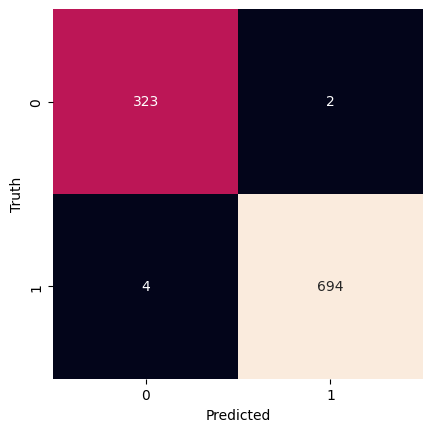

In [ ]:
train_model(model, X_train_scaled, y_train_scaled, 0.001, 30, 32, X_test_scaled, y_test_scaled)

Epoch 1/30: Loss: 0.0164, Accuracy: 0.9945, Validation Loss: 0.0297, Validation Accuracy: 0.9922
Epoch 2/30: Loss: 0.0146, Accuracy: 0.9954, Validation Loss: 0.0284, Validation Accuracy: 0.9912
Epoch 3/30: Loss: 0.0148, Accuracy: 0.9954, Validation Loss: 0.0285, Validation Accuracy: 0.9912
Epoch 4/30: Loss: 0.0148, Accuracy: 0.9954, Validation Loss: 0.0286, Validation Accuracy: 0.9912
Epoch 5/30: Loss: 0.0147, Accuracy: 0.9954, Validation Loss: 0.0288, Validation Accuracy: 0.9912
Epoch 6/30: Loss: 0.0148, Accuracy: 0.9954, Validation Loss: 0.0290, Validation Accuracy: 0.9922
Epoch 7/30: Loss: 0.0147, Accuracy: 0.9954, Validation Loss: 0.0284, Validation Accuracy: 0.9912
Epoch 8/30: Loss: 0.0147, Accuracy: 0.9954, Validation Loss: 0.0287, Validation Accuracy: 0.9912
Epoch 9/30: Loss: 0.0148, Accuracy: 0.9954, Validation Loss: 0.0285, Validation Accuracy: 0.9922
Epoch 10/30: Loss: 0.0147, Accuracy: 0.9954, Validation Loss: 0.0286, Validation Accuracy: 0.9912
Epoch 11/30: Loss: 0.0147, Ac

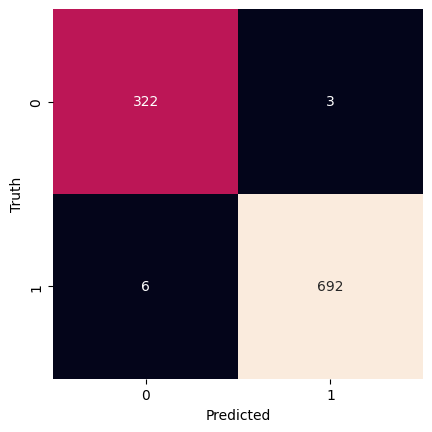

In [ ]:
train_model(model, X_train_scaled, y_train_scaled, 0.001, 30, 64, X_test_scaled, y_test_scaled)

Epoch 1/30: Loss: 0.3980, Accuracy: 0.8746, Validation Loss: 0.1314, Validation Accuracy: 0.9824
Epoch 2/30: Loss: 0.1192, Accuracy: 0.9748, Validation Loss: 0.1170, Validation Accuracy: 0.9599
Epoch 3/30: Loss: 0.1161, Accuracy: 0.9656, Validation Loss: 0.0666, Validation Accuracy: 0.9814
Epoch 4/30: Loss: 0.0738, Accuracy: 0.9769, Validation Loss: 0.0497, Validation Accuracy: 0.9824
Epoch 5/30: Loss: 0.0669, Accuracy: 0.9790, Validation Loss: 0.0482, Validation Accuracy: 0.9824
Epoch 6/30: Loss: 0.0629, Accuracy: 0.9807, Validation Loss: 0.0397, Validation Accuracy: 0.9912
Epoch 7/30: Loss: 0.0637, Accuracy: 0.9841, Validation Loss: 0.0433, Validation Accuracy: 0.9883
Epoch 8/30: Loss: 0.0652, Accuracy: 0.9832, Validation Loss: 0.0436, Validation Accuracy: 0.9834
Epoch 9/30: Loss: 0.0586, Accuracy: 0.9832, Validation Loss: 0.0395, Validation Accuracy: 0.9853
Epoch 10/30: Loss: 0.0632, Accuracy: 0.9832, Validation Loss: 0.0417, Validation Accuracy: 0.9834
Epoch 11/30: Loss: 0.0611, Ac

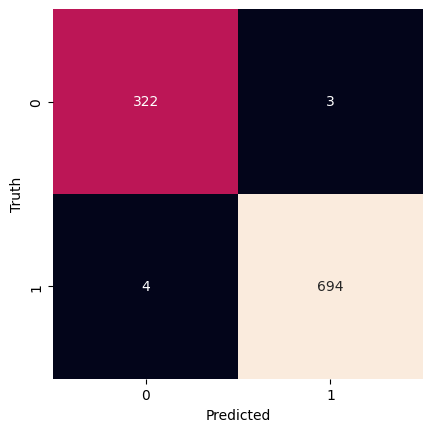

In [ ]:
train_model(model,X_train_scaled, y_train_scaled, 0.05, 30, 64, X_test_scaled, y_test_scaled)

Epoch 1/30: Loss: 0.0144, Accuracy: 0.9945, Validation Loss: 0.0307, Validation Accuracy: 0.9922
Epoch 2/30: Loss: 0.0134, Accuracy: 0.9958, Validation Loss: 0.0304, Validation Accuracy: 0.9922
Epoch 3/30: Loss: 0.0133, Accuracy: 0.9954, Validation Loss: 0.0300, Validation Accuracy: 0.9922
Epoch 4/30: Loss: 0.0133, Accuracy: 0.9954, Validation Loss: 0.0298, Validation Accuracy: 0.9932
Epoch 5/30: Loss: 0.0132, Accuracy: 0.9954, Validation Loss: 0.0301, Validation Accuracy: 0.9932
Epoch 6/30: Loss: 0.0132, Accuracy: 0.9954, Validation Loss: 0.0302, Validation Accuracy: 0.9932
Epoch 7/30: Loss: 0.0133, Accuracy: 0.9954, Validation Loss: 0.0301, Validation Accuracy: 0.9932
Epoch 8/30: Loss: 0.0132, Accuracy: 0.9954, Validation Loss: 0.0298, Validation Accuracy: 0.9932
Epoch 9/30: Loss: 0.0132, Accuracy: 0.9954, Validation Loss: 0.0297, Validation Accuracy: 0.9932
Epoch 10/30: Loss: 0.0132, Accuracy: 0.9954, Validation Loss: 0.0303, Validation Accuracy: 0.9932
Epoch 11/30: Loss: 0.0132, Ac

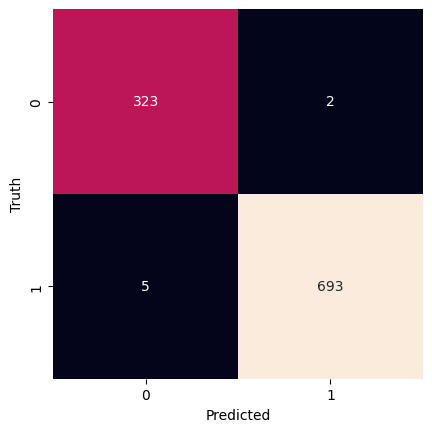

In [ ]:
train_model(model, X_train_scaled, y_train_scaled, 0.001, 30, 128, X_test_scaled, y_test_scaled)

Epoch 1/30: Loss: 0.0406, Accuracy: 0.9904, Validation Loss: 0.0273, Validation Accuracy: 0.9932
Epoch 2/30: Loss: 0.0358, Accuracy: 0.9920, Validation Loss: 0.0267, Validation Accuracy: 0.9922
Epoch 3/30: Loss: 0.0351, Accuracy: 0.9920, Validation Loss: 0.0269, Validation Accuracy: 0.9922
Epoch 4/30: Loss: 0.0349, Accuracy: 0.9920, Validation Loss: 0.0268, Validation Accuracy: 0.9932
Epoch 5/30: Loss: 0.0341, Accuracy: 0.9916, Validation Loss: 0.0271, Validation Accuracy: 0.9932
Epoch 6/30: Loss: 0.0335, Accuracy: 0.9920, Validation Loss: 0.0271, Validation Accuracy: 0.9932
Epoch 7/30: Loss: 0.0332, Accuracy: 0.9924, Validation Loss: 0.0269, Validation Accuracy: 0.9932
Epoch 8/30: Loss: 0.0325, Accuracy: 0.9924, Validation Loss: 0.0273, Validation Accuracy: 0.9932
Epoch 9/30: Loss: 0.0326, Accuracy: 0.9924, Validation Loss: 0.0270, Validation Accuracy: 0.9932
Epoch 10/30: Loss: 0.0322, Accuracy: 0.9924, Validation Loss: 0.0270, Validation Accuracy: 0.9932
Epoch 11/30: Loss: 0.0321, Ac

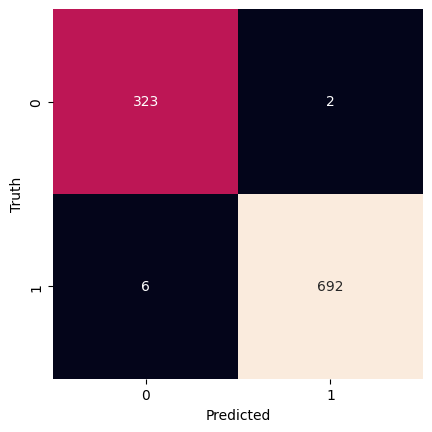

In [ ]:
train_model(model, X_train_scaled, y_train_scaled, 0.007, 30, 64, X_test_scaled, y_test_scaled)

Epoch 1/30: Loss: 0.0283, Accuracy: 0.9916, Validation Loss: 0.0275, Validation Accuracy: 0.9932
Epoch 2/30: Loss: 0.0272, Accuracy: 0.9916, Validation Loss: 0.0273, Validation Accuracy: 0.9932
Epoch 3/30: Loss: 0.0268, Accuracy: 0.9916, Validation Loss: 0.0274, Validation Accuracy: 0.9932
Epoch 4/30: Loss: 0.0265, Accuracy: 0.9920, Validation Loss: 0.0272, Validation Accuracy: 0.9932
Epoch 5/30: Loss: 0.0264, Accuracy: 0.9920, Validation Loss: 0.0277, Validation Accuracy: 0.9932
Epoch 6/30: Loss: 0.0264, Accuracy: 0.9916, Validation Loss: 0.0280, Validation Accuracy: 0.9932
Epoch 7/30: Loss: 0.0262, Accuracy: 0.9916, Validation Loss: 0.0280, Validation Accuracy: 0.9932
Epoch 8/30: Loss: 0.0261, Accuracy: 0.9916, Validation Loss: 0.0282, Validation Accuracy: 0.9932
Epoch 9/30: Loss: 0.0261, Accuracy: 0.9916, Validation Loss: 0.0281, Validation Accuracy: 0.9932
Epoch 10/30: Loss: 0.0261, Accuracy: 0.9912, Validation Loss: 0.0281, Validation Accuracy: 0.9932
Epoch 11/30: Loss: 0.0258, Ac

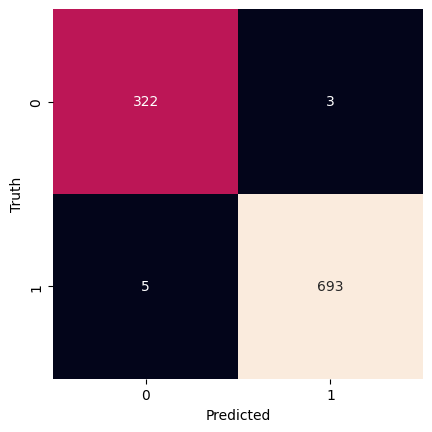

In [ ]:
train_model(model,X_train_scaled, y_train_scaled, 0.001, 30, 16, X_test_scaled, y_test_scaled)

Epoch 1/30: Loss: 0.0243, Accuracy: 0.9924, Validation Loss: 0.0316, Validation Accuracy: 0.9892
Epoch 2/30: Loss: 0.0206, Accuracy: 0.9937, Validation Loss: 0.0268, Validation Accuracy: 0.9922
Epoch 3/30: Loss: 0.0194, Accuracy: 0.9941, Validation Loss: 0.0283, Validation Accuracy: 0.9922
Epoch 4/30: Loss: 0.0191, Accuracy: 0.9941, Validation Loss: 0.0281, Validation Accuracy: 0.9912
Epoch 5/30: Loss: 0.0194, Accuracy: 0.9941, Validation Loss: 0.0294, Validation Accuracy: 0.9912
Epoch 6/30: Loss: 0.0187, Accuracy: 0.9945, Validation Loss: 0.0279, Validation Accuracy: 0.9912
Epoch 7/30: Loss: 0.0201, Accuracy: 0.9937, Validation Loss: 0.0291, Validation Accuracy: 0.9912
Epoch 8/30: Loss: 0.0188, Accuracy: 0.9945, Validation Loss: 0.0288, Validation Accuracy: 0.9912
Epoch 9/30: Loss: 0.0196, Accuracy: 0.9941, Validation Loss: 0.0301, Validation Accuracy: 0.9902
Epoch 10/30: Loss: 0.0192, Accuracy: 0.9945, Validation Loss: 0.0280, Validation Accuracy: 0.9912
Epoch 11/30: Loss: 0.0185, Ac

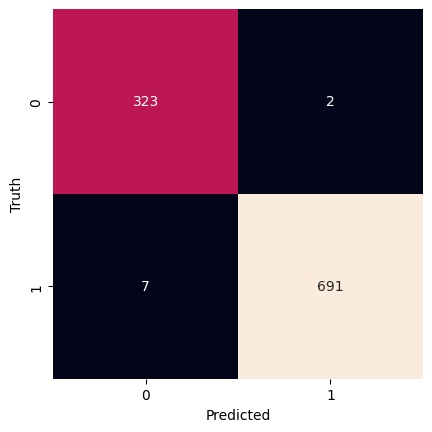

In [ ]:
train_model(model, X_train_scaled, y_train_scaled, 0.005, 30, 128, X_test_scaled, y_test_scaled)

### **SHAP ANALYSIS FOR NEURAL NETWORK**

In [ ]:
explainer_nn = shap.Explainer(model, X_train_scaled)
nn_shap_values = explainer_nn(X_test_scaled)

ExactExplainer explainer: 1024it [00:41, 23.17it/s]                          


In [ ]:
nn_shap_0 = nn_shap_values[y_test_scaled == 0].values
nn_shap_1 = nn_shap_values[y_test_scaled == 1].values

In [ ]:
nn_shap_0_mean = nn_shap_0.mean(0)
nn_shap_1_mean = nn_shap_1.mean(0)

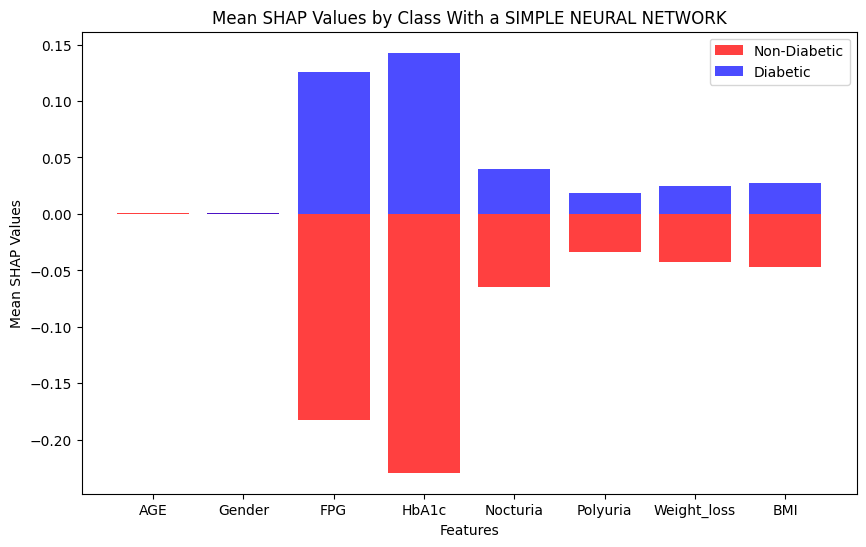

In [ ]:
plot_shap(nn_shap_0_mean, nn_shap_1_mean, model)

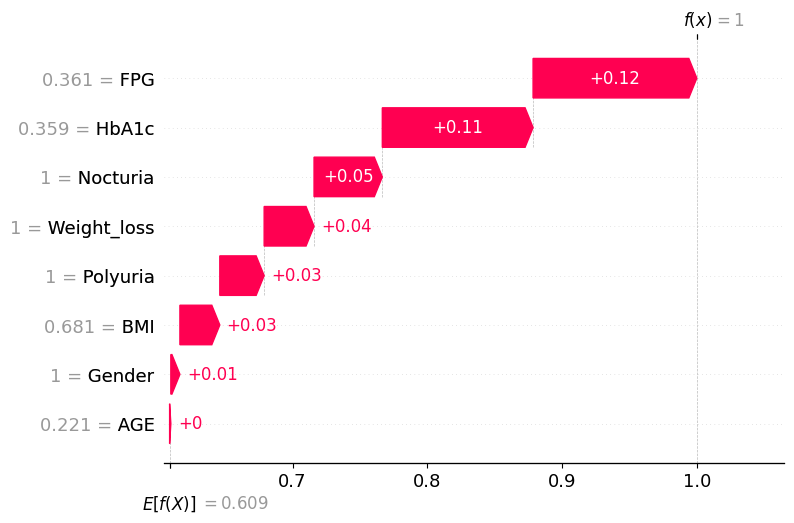

In [ ]:
instance_to_explain = X_test_scaled[[2]]
waterfall_plot(instance_to_explain, model)

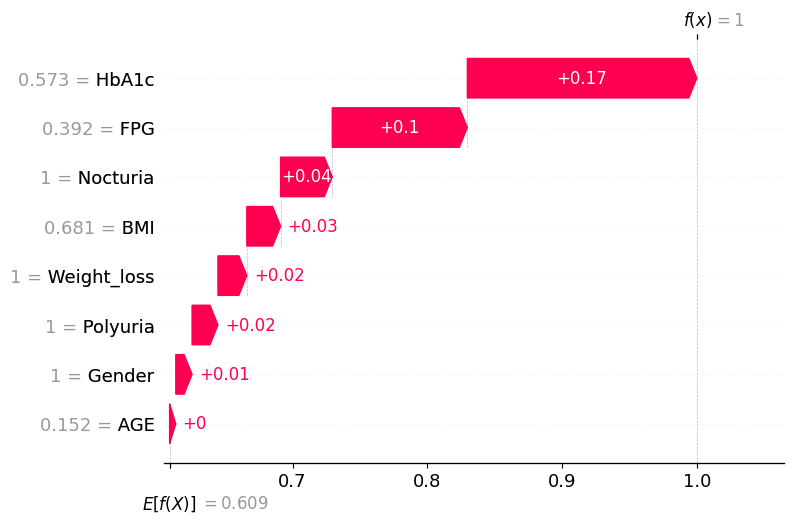

In [ ]:
instance_to_explain = X_test_scaled[[0]]
waterfall_plot(instance_to_explain, model)

In [ ]:
instance_to_explain = X_test_scaled[[99]]

In [ ]:
features_to_inverse = ['AGE','FPG','HbA1c','BMI']
cx = pd.DataFrame(X_test_nn, columns=columns).iloc[99]
selected_features = cx[features_to_inverse].values.reshape(1, -1)

scaler.inverse_transform(selected_features)

array([[59. ,  9.1,  8.7, 31. ]])

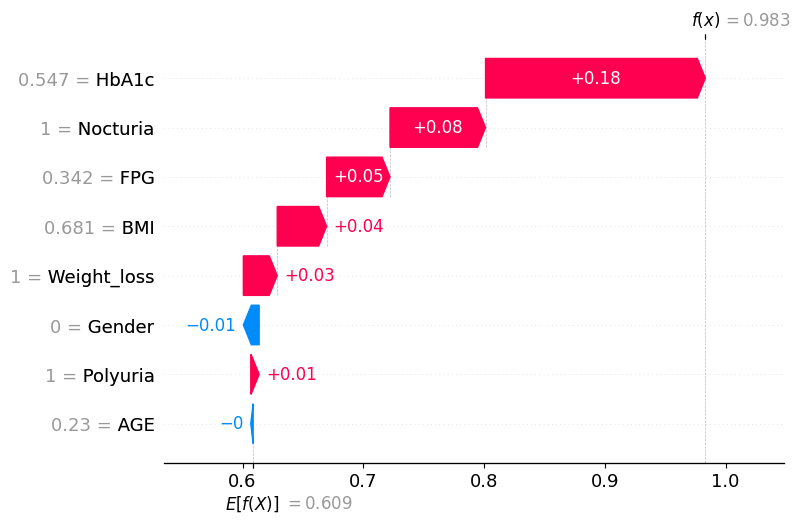

In [ ]:
waterfall_plot(instance_to_explain, model)

In [ ]:
def create_dependence_plots(feature_index, feature_interaction_index):
    shap.dependence_plot(feature_index, nn_shap_1, X_test_scaled[y_test_scaled == 1], feature_names=X_test.columns, display_features=X_test_scaled, interaction_index=feature_interaction_index)
    plt.tight_layout()
    plt.show()

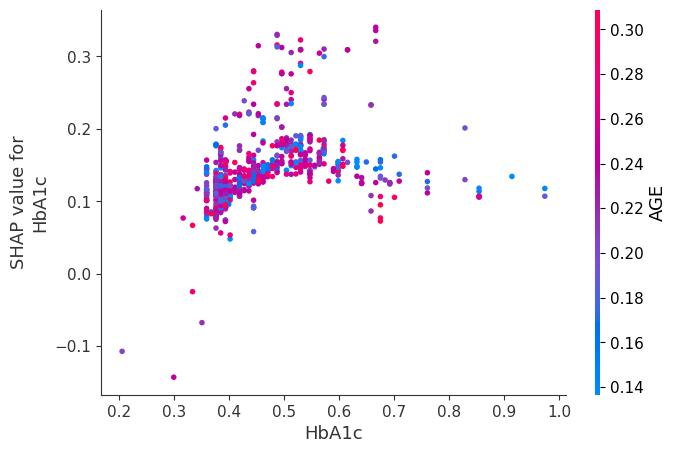

<Figure size 640x480 with 0 Axes>

In [ ]:
create_dependence_plots(3,0)

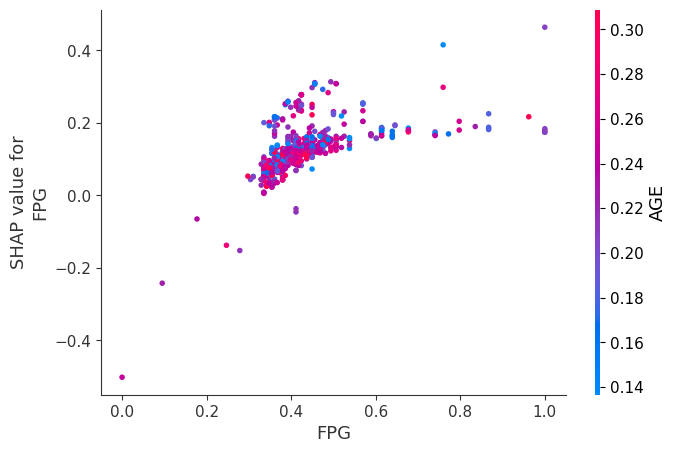

<Figure size 640x480 with 0 Axes>

In [ ]:
create_dependence_plots(2,0)

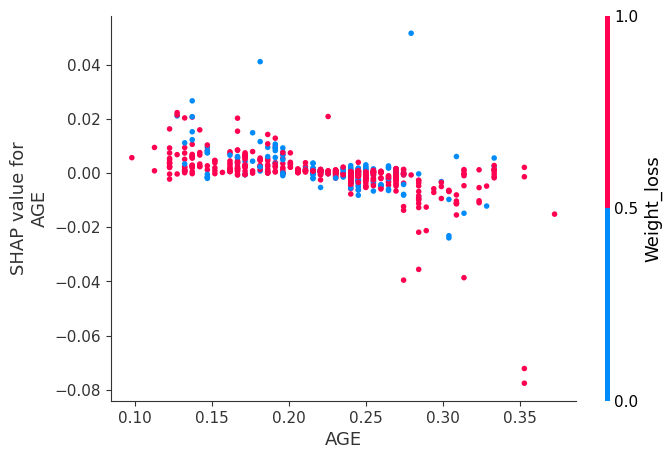

<Figure size 640x480 with 0 Axes>

In [ ]:
create_dependence_plots(0,6)

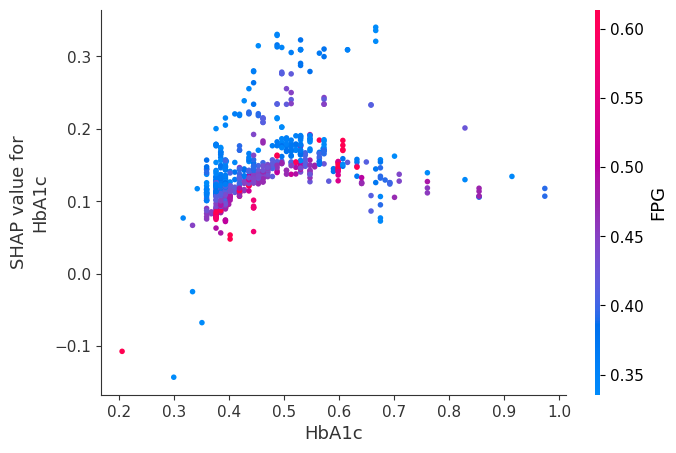

<Figure size 640x480 with 0 Axes>

In [ ]:
create_dependence_plots(3,2)

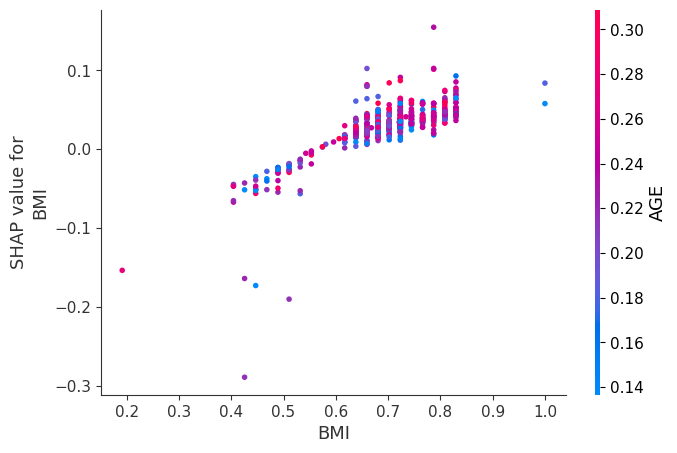

<Figure size 640x480 with 0 Axes>

In [ ]:
create_dependence_plots(7,0)

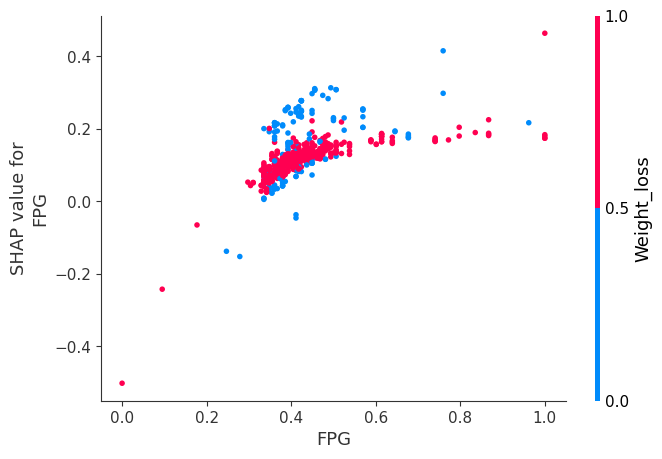

<Figure size 640x480 with 0 Axes>

In [ ]:
create_dependence_plots(2,6)

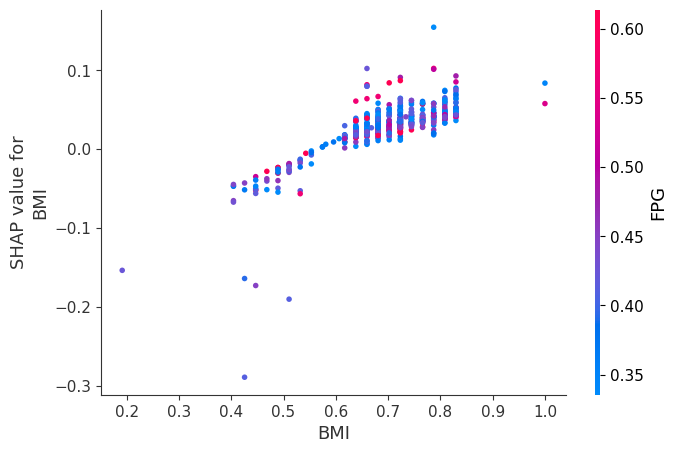

<Figure size 640x480 with 0 Axes>

In [ ]:
create_dependence_plots(7,2)

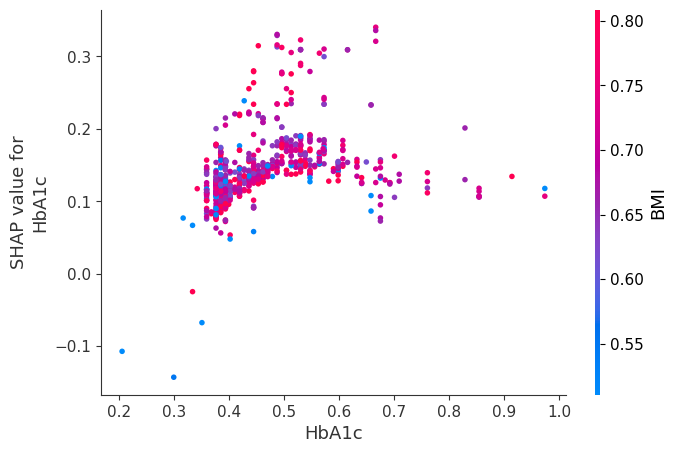

<Figure size 640x480 with 0 Axes>

In [ ]:
create_dependence_plots(3,7)

In [ ]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('svm', svm_model),
                                    ('rf', rf_model),
                                    ('xgb', xgb_model)
                                    ])


In [ ]:
eclf.fit(X_train,y_train)

In [ ]:
y_pred = eclf.predict(X_test)

#### Model Performance Assessment With Stratifiedkfold

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [ ]:
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

In [ ]:
def mse_loss(actual, predicted):
    squared_errors = [(actual - predicted)]
    mse = np.mean(squared_errors)
    return mse

best_fold = 0
best_accuracy = 0
def train_model(x_train, y_train, x_test, y_test, fold_no, model):
   global best_accuracy, best_fold, best_cm

   if isinstance(model, XGBClassifier):
        model.fit(x_train, y_train, eval_set=[(x_test, y_test)], verbose=False)
        predictions = model.predict(x_test)
   else:
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)


   accuracy = accuracy_score(y_test, predictions)
   print('Fold',str(fold_no),'Accuracy:',accuracy, 'Loss:',mse_loss(y_test, predictions))
   print(classification_report(y_test,predictions))
   cm = confusion_matrix(y_test, predictions)

   if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_fold = fold_no
        best_cm = cm

   print('-' * 60)


In [ ]:
def stratified_kf(model, X, Y, fold_no=1):
  for train_idx, val_idx in skf.split(X, Y):
    X_train, X_test = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_test = Y.iloc[train_idx], Y.iloc[val_idx]
    train_model(X_train, y_train,X_test,y_test, fold_no, model)
    fold_no += 1

####Testing Random Forest Model with Sample Data Using Stratifiedkfold

In [ ]:
# STRATIFIEDKFOLD WITH RANDOM FOREST
stratified_kf(rf_model, X, y)

In [ ]:
stratified_kf(xgb_model, X, y)

In [ ]:
def predict_outcome(x,model):
    df_point = pd.DataFrame(x, index=[0])
    prediction = model.predict(df_point)
    return prediction[0]

In [ ]:
actual_outcome = y_test.iloc[96]
predicted_outcome = predict_outcome(X_test.iloc[96].to_dict(),rf_model)
print('Actual Outcome:',actual_outcome , ', Predicted Outcome:', predicted_outcome)

In [ ]:
actual_outcome = y_test.iloc[96]